# Airbnb Pricing Prediction

## Business Problem

One challenge that Airbnb hosts face is determining the optimal price. In many areas, would-be renters are presented with a good selection of listings and can filter by criteria like price, number of bedrooms, room type, and more. Let’s imagine we have a room we’d like to rent on Airbnb. As hosts, if we try to charge above market price, renters will select more affordable alternatives and we won’t make any money. On the other hand, if we set our nightly rent price too low, we’ll miss out on potential revenue.

How can we hit the “sweet spot” in the middle? One strategy we could use is to:

1. Find a few listings that are similar to ours,
2. Average the listed price for the ones most similar to ours,
3. And set our listing price to this calculated average price

Instead of doing it manually, we’re going to build a machine learning model using techniques such as Linear Regression and K-Nearest Neighbors (KNN).


**Question: What price should a new Airbnb host set for their hosting to get a higher score and more bookings?**




In [144]:
# Import the libraries we will be using
import numpy as np
import pandas as pd
from pandas.plotting._misc import scatter_matrix
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#import folium
#from folium.plugins import FastMarkerCluster
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
plt.rcParams['figure.figsize'] = 15, 12

Importing the data and using only the relevant columns (removing all the non-essential columns)

In [145]:
#Loading the data

url1 = 'http://data.insideairbnb.com/greece/attica/athens/2021-12-23/data/listings.csv.gz'
df = pd.read_csv(url1)#, header=0, index_col=0)

In [146]:
#Printing the data
df

id  ... reviews_per_month
0        10595  ...              0.25
1        10990  ...              0.48
2        10993  ...              0.67
3        10995  ...              0.19
4        27262  ...              0.15
...        ...  ...               ...
9668  53928165  ...               NaN
9669  53930376  ...               NaN
9670  53932240  ...               NaN
9671  53934984  ...               NaN
9672  53938913  ...               NaN

[9673 rows x 74 columns]

In [147]:
#Checking for null values
df.isnull().values.any()

True

In [148]:
#Select columns of interest
analysis = df[['neighbourhood_cleansed','neighbourhood_group_cleansed','latitude','longitude','host_is_superhost','room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'price','availability_365', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'reviews_per_month']]



In [149]:
#df.to_excel('data.xls')

In [150]:
#andf=pd.DataFrame(analysis)
#andf.shape[1]

In [151]:
analysis.describe()#[['beds','bedrooms']].describe()


neighbourhood_group_cleansed  ...  reviews_per_month
count                           0.0  ...        7916.000000
mean                            NaN  ...           1.520586
std                             NaN  ...           1.590922
min                             NaN  ...           0.010000
25%                             NaN  ...           0.350000
50%                             NaN  ...           1.000000
75%                             NaN  ...           2.172500
max                             NaN  ...          20.390000

[8 rows x 11 columns]

In [152]:
analysis.groupby("beds").mean()

neighbourhood_group_cleansed  ...  reviews_per_month
beds                                ...                   
1.0                            NaN  ...           1.619041
2.0                            NaN  ...           1.541189
3.0                            NaN  ...           1.402897
4.0                            NaN  ...           1.354036
5.0                            NaN  ...           1.452128
6.0                            NaN  ...           1.055730
7.0                            NaN  ...           1.460870
8.0                            NaN  ...           0.807576
9.0                            NaN  ...           0.572857
10.0                           NaN  ...           1.342857
11.0                           NaN  ...           1.270000
12.0                           NaN  ...                NaN
13.0                           NaN  ...           1.260000
14.0                           NaN  ...           1.000000
15.0                           NaN  ...           1.110000
16.0                           NaN  ...           0.522500
20.0                           NaN  ...                NaN
21.0                           NaN  ...           0.540000
40.0                           NaN  ...                NaN
44.0                           NaN  ...                NaN

[20 rows x 10 columns]

In [153]:
analysis.isna().sum()

neighbourhood_cleansed             0
neighbourhood_group_cleansed    9673
latitude                           0
longitude                          0
host_is_superhost                  1
room_type                          0
accommodates                       0
bathrooms_text                     8
bedrooms                         831
beds                             159
price                              0
availability_365                   0
minimum_nights                     0
maximum_nights                     0
review_scores_rating            1757
reviews_per_month               1757
dtype: int64

In [154]:
#Replace NaN to 0
#analysis = analysis.fillna(0)
analysis.bedrooms=analysis.bedrooms.fillna(round(analysis.bedrooms.mean()))
analysis.beds=analysis.beds.fillna(round(analysis.beds.mean()))
analysis.head()

neighbourhood_cleansed  ...  reviews_per_month
0            ΑΜΠΕΛΟΚΗΠΟΙ  ...               0.25
1            ΑΜΠΕΛΟΚΗΠΟΙ  ...               0.48
2            ΑΜΠΕΛΟΚΗΠΟΙ  ...               0.67
3            ΑΜΠΕΛΟΚΗΠΟΙ  ...               0.19
4            ΑΜΠΕΛΟΚΗΠΟΙ  ...               0.15

[5 rows x 16 columns]

In [155]:
analysis.isna().sum()

neighbourhood_cleansed             0
neighbourhood_group_cleansed    9673
latitude                           0
longitude                          0
host_is_superhost                  1
room_type                          0
accommodates                       0
bathrooms_text                     8
bedrooms                           0
beds                               0
price                              0
availability_365                   0
minimum_nights                     0
maximum_nights                     0
review_scores_rating            1757
reviews_per_month               1757
dtype: int64

In [156]:
analysis.host_is_superhost = analysis.host_is_superhost.fillna(analysis['host_is_superhost'].value_counts().index[0])

In [157]:
analysis.review_scores_rating.mean()

4.727678120262731

In [158]:
analysis.review_scores_rating = analysis.review_scores_rating.fillna(analysis.review_scores_rating.mean())

analysis.reviews_per_month=analysis.reviews_per_month.fillna(0)

In [159]:
analysis.isna().sum()

neighbourhood_cleansed             0
neighbourhood_group_cleansed    9673
latitude                           0
longitude                          0
host_is_superhost                  0
room_type                          0
accommodates                       0
bathrooms_text                     8
bedrooms                           0
beds                               0
price                              0
availability_365                   0
minimum_nights                     0
maximum_nights                     0
review_scores_rating               0
reviews_per_month                  0
dtype: int64

In [160]:
for idx, row in analysis.iterrows():
    if  analysis.neighbourhood_cleansed[idx] in ('ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ' ,  'ΣΤΑΔΙΟ' ,  'ΑΚΡΟΠΟΛΗ', 'ΚΟΛΩΝΑΚΙ',  'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ' , 'ΖΑΠΠΕΙΟ', 'ΛΥΚΑΒΗΤΤΟΣ', 'ΡΗΓΙΛΛΗΣ', 'ΘΗΣΕΙΟ'):
        analysis.neighbourhood_group_cleansed[idx] = 'ΚΕΝΤΡΟ 1'
        
for idx, row in analysis.iterrows():
    if  analysis.neighbourhood_cleansed[idx] in ('ΑΜΠΕΛΟΚΗΠΟΙ', 'ΓΟΥΔΙ','ΓΚΥΖΗ','ΠΕΝΤΑΓΩΝΟ', 'ΕΛΛΗΝΟΡΩΣΩΝ'):
        analysis.neighbourhood_group_cleansed[idx] = 'ΒΑ. ΚΕΝΤΡΟ'
        
for idx, row in analysis.iterrows():
    if  analysis.neighbourhood_cleansed[idx] in ('ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ' ,  'ΝΕΑ ΚΥΨΕΛΗ',  'ΠΑΤΗΣΙΑ', 'ΑΝΩ ΠΑΤΗΣΙΑ',  'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ', 'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ', 'ΠΕΔΙΟ ΑΡΕΩΣ', 'ΝΙΡΒΑΝΑ', 'ΚΥΨΕΛΗ', 'ΑΝΩ ΚΥΨΕΛΗ', 'ΠΟΛΥΓΩΝΟ', 'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ', 'ΡΙΖΟΥΠΟΛΗ', 'ΠΡΟΜΠΟΝΑ'):
        analysis.neighbourhood_group_cleansed[idx] = 'ΒΔ. ΚΕΝΤΡΟ'
        
for idx, row in analysis.iterrows():
    if  analysis.neighbourhood_cleansed[idx] in ( 'ΠΑΓΚΡΑΤΙ', 'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ',  'ΠΕΤΡΑΛΩΝΑ' , 
 'ΓΟΥΒΑ', '1Ο ΝΕΚΡΟΤΑΦΕΙΟ', 'ΝΕΟΣ ΚΟΣΜΟΣ','ΙΛΙΣΙΑ'):
        analysis.neighbourhood_group_cleansed[idx] = 'ΚΕΝΤΡΟ 2'
        
for idx, row in analysis.iterrows():
    if  analysis.neighbourhood_cleansed[idx] in ('ΚΕΡΑΜΕΙΚΟΣ', 'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ', 'ΓΚΑΖΙ',  'ΚΟΛΩΝΟΣ',  'ΣΕΠΟΛΙΑ', 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ',  'ΚΟΛΟΚΥΝΘΟΥ', 'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ', 'ΒΟΤΑΝΙΚΟΣ'):
        analysis.neighbourhood_group_cleansed[idx] = 'ΔΥΤΙΚΑ ΠΡΟΑΣΤΙΑ'

In [161]:
analysis.isna().sum()

neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
host_is_superhost               0
room_type                       0
accommodates                    0
bathrooms_text                  8
bedrooms                        0
beds                            0
price                           0
availability_365                0
minimum_nights                  0
maximum_nights                  0
review_scores_rating            0
reviews_per_month               0
dtype: int64

In [162]:
pd.DataFrame(analysis)

neighbourhood_cleansed  ... reviews_per_month
0                          ΑΜΠΕΛΟΚΗΠΟΙ  ...              0.25
1                          ΑΜΠΕΛΟΚΗΠΟΙ  ...              0.48
2                          ΑΜΠΕΛΟΚΗΠΟΙ  ...              0.67
3                          ΑΜΠΕΛΟΚΗΠΟΙ  ...              0.19
4                          ΑΜΠΕΛΟΚΗΠΟΙ  ...              0.15
...                                ...  ...               ...
9668  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  ...              0.00
9669                          ΚΟΛΩΝΑΚΙ  ...              0.00
9670  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  ...              0.00
9671                   ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ  ...              0.00
9672                        ΝΕΑ ΚΥΨΕΛΗ  ...              0.00

[9673 rows x 16 columns]

In [163]:
analysis.describe()


latitude    longitude  ...  review_scores_rating  reviews_per_month
count  9673.000000  9673.000000  ...           9673.000000        9673.000000
mean     37.979912    23.731762  ...              4.727678           1.244387
std       0.013241     0.012369  ...              0.451388           1.554022
min      37.950550    23.697700  ...              0.000000           0.000000
25%      37.969230    23.723970  ...              4.727678           0.090000
50%      37.978340    23.729810  ...              4.800000           0.660000
75%      37.987960    23.737820  ...              4.950000           1.830000
max      38.034497    23.780220  ...              5.000000          20.390000

[8 rows x 10 columns]

In [164]:
analysis.shape

(9673, 16)

In [165]:
analysis.dtypes

neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
host_is_superhost                object
room_type                        object
accommodates                      int64
bathrooms_text                   object
bedrooms                        float64
beds                            float64
price                            object
availability_365                  int64
minimum_nights                    int64
maximum_nights                    int64
review_scores_rating            float64
reviews_per_month               float64
dtype: object

In [166]:
#analysis["price"].str.replace("$","")

In [167]:
#from sklearn import preprocessing

#Create a new varialbe to show popularity of each listing
analysis['popularity'] = analysis['review_scores_rating'] * analysis['reviews_per_month'] #kanto fragmeno

# standardization των features του training set
#analysis.popularity = pd.DataFrame(preprocessing.scale(analysis.popularity))

analysis = analysis.sort_values(by=['popularity'], ascending=False)
analysis#.head()

neighbourhood_cleansed  ... popularity
6689  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  ...    93.3862
8682               ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ  ...    58.1438
5113            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  ...    56.1688
6532            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  ...    55.0792
7999               ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ  ...    53.1947
...                                ...  ...        ...
6285            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  ...     0.0000
6286            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  ...     0.0000
6287            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  ...     0.0000
6289            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  ...     0.0000
9672                        ΝΕΑ ΚΥΨΕΛΗ  ...     0.0000

[9673 rows x 17 columns]

In [168]:
analysis = analysis.sort_values(by=['review_scores_rating'], ascending=False)
analysis

neighbourhood_cleansed  ... popularity
6055  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  ...       0.35
3517                            ΘΗΣΕΙΟ  ...       1.85
7641               ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ  ...       1.85
8991            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  ...       1.85
9122  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  ...       1.85
...                                ...  ...        ...
2330                       ΝΕΟΣ ΚΟΣΜΟΣ  ...       0.00
4314                           ΝΙΡΒΑΝΑ  ...       0.00
2828                       ΝΕΟΣ ΚΟΣΜΟΣ  ...       0.00
3528  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  ...       0.00
1290            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  ...       0.00

[9673 rows x 17 columns]

In [169]:
analysis.describe()

latitude    longitude  ...  reviews_per_month   popularity
count  9673.000000  9673.000000  ...        9673.000000  9673.000000
mean     37.979912    23.731762  ...           1.244387     5.958522
std       0.013241     0.012369  ...           1.554022     7.493605
min      37.950550    23.697700  ...           0.000000     0.000000
25%      37.969230    23.723970  ...           0.090000     0.400000
50%      37.978340    23.729810  ...           0.660000     3.087000
75%      37.987960    23.737820  ...           1.830000     8.757600
max      38.034497    23.780220  ...          20.390000    93.386200

[8 rows x 11 columns]

In [170]:
#analysis['neighbourhood_group_cleansed'] = analysis['neighbourhood_group_cleansed'].astype('category')
#analysis['room_type'] = analysis['room_type'].astype('category')
#analysis['host_acceptance_rate'] =analysis['host_acceptance_rate'].astype(str)
#analysis['host_acceptance_rate'] = analysis['host_acceptance_rate'].str.replace('%', '')
#analysis['host_acceptance_rate'] = analysis['host_acceptance_rate'].astype(int)
analysis['host_is_superhost'] =analysis['host_is_superhost'].astype(str)
analysis['host_is_superhost'] = analysis['host_is_superhost'].str.replace('t', '1')
analysis['host_is_superhost'] = analysis['host_is_superhost'].str.replace('f', '0')
analysis['host_is_superhost'] = analysis['host_is_superhost'].astype(int)
analysis['price'] =analysis['price'].astype(str)
analysis['price'] = analysis['price'].str.replace(',', '')
analysis['price'] = analysis['price'].str.replace('$', '')
analysis['price'] = analysis['price'].astype(float)
analysis.dtypes

neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
host_is_superhost                 int64
room_type                        object
accommodates                      int64
bathrooms_text                   object
bedrooms                        float64
beds                            float64
price                           float64
availability_365                  int64
minimum_nights                    int64
maximum_nights                    int64
review_scores_rating            float64
reviews_per_month               float64
popularity                      float64
dtype: object

In [171]:
an_des=analysis.describe()
an_des=np.array(an_des)
pop_threshold_25=an_des[6,12]
#Πιο σύντομα:
#pop_threshold_25=analysis["popularity"].quantile(0.75)

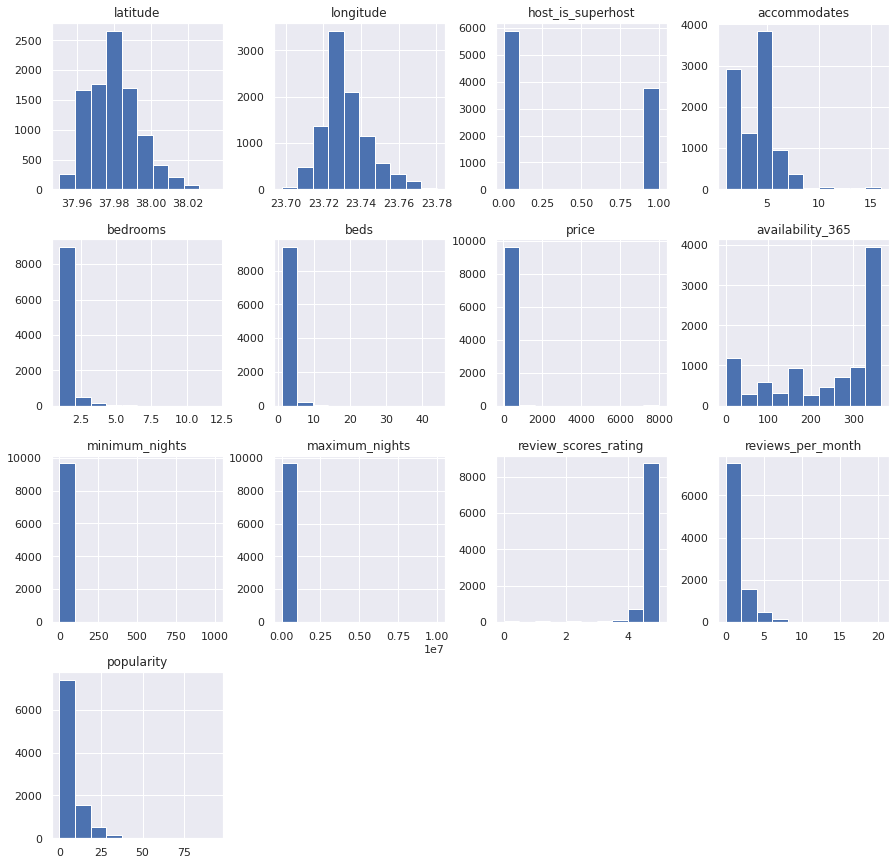

In [172]:
fig, ax = plt.subplots(figsize=(15, 15))
analysis.hist(ax=ax)
plt.show()

In [173]:
from pandas.plotting._misc import scatter_matrix
columns_taken=['price','room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds','availability_365', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'reviews_per_month','popularity']

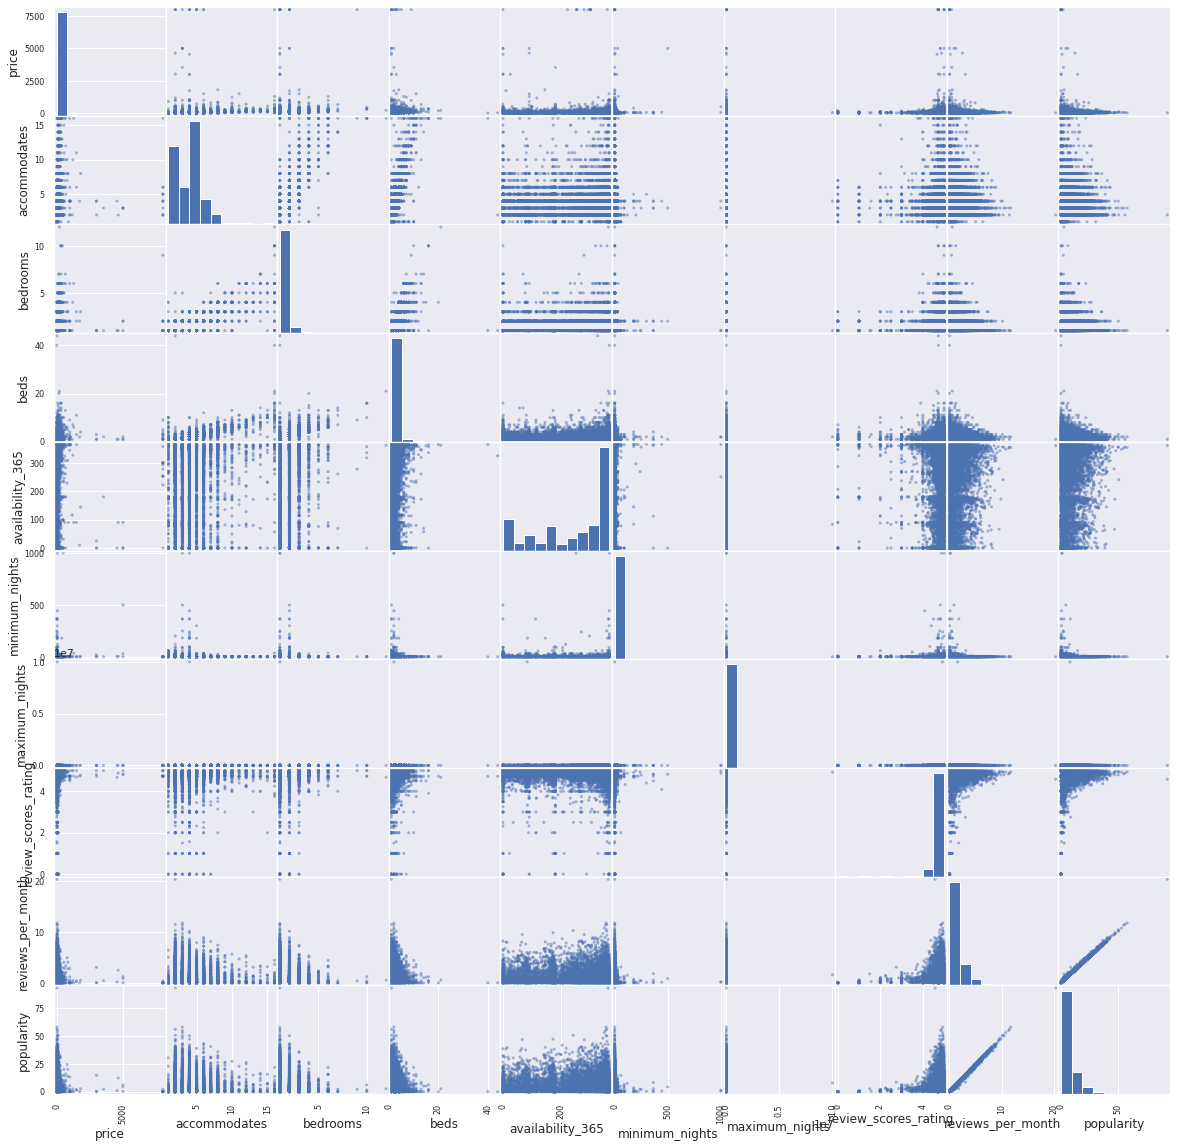

In [174]:
scatter_plots = scatter_matrix(analysis[columns_taken],figsize=(20,20))

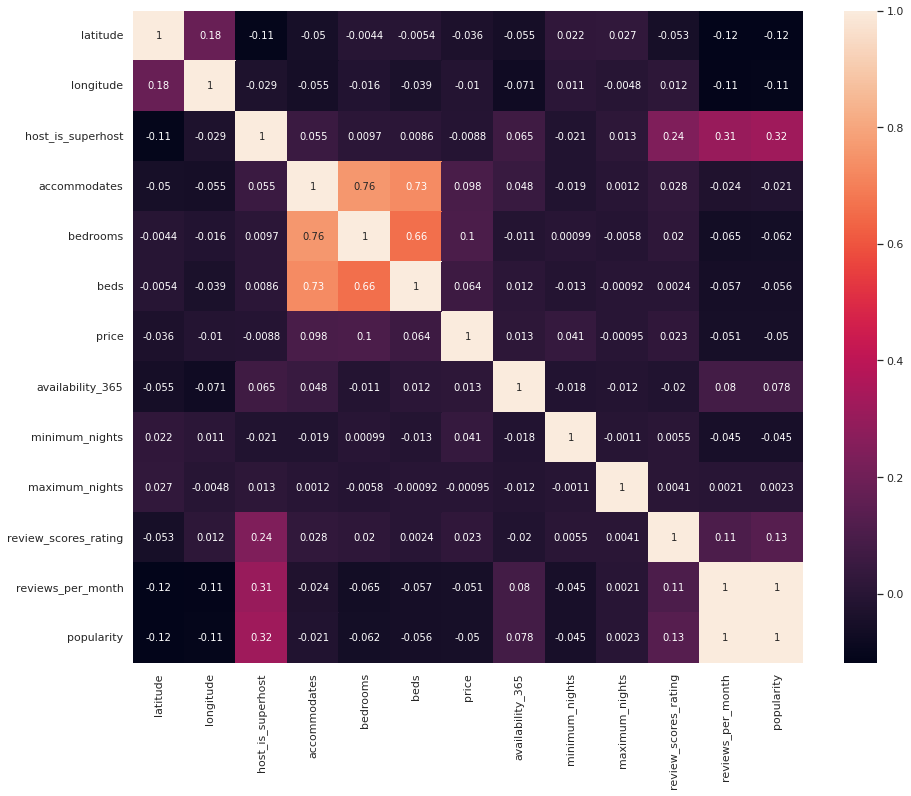

In [175]:
correlation_mat = analysis.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

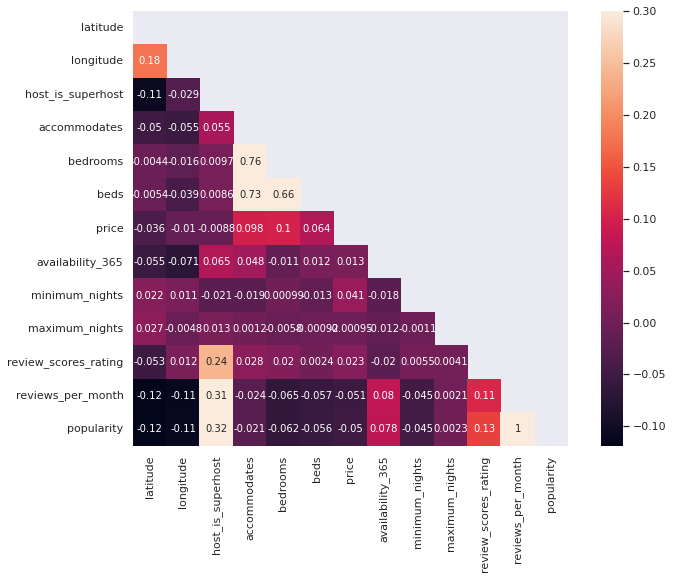

In [176]:

corr = analysis.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

In [177]:
a = analysis.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True).head(20)
d = analysis.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(20)

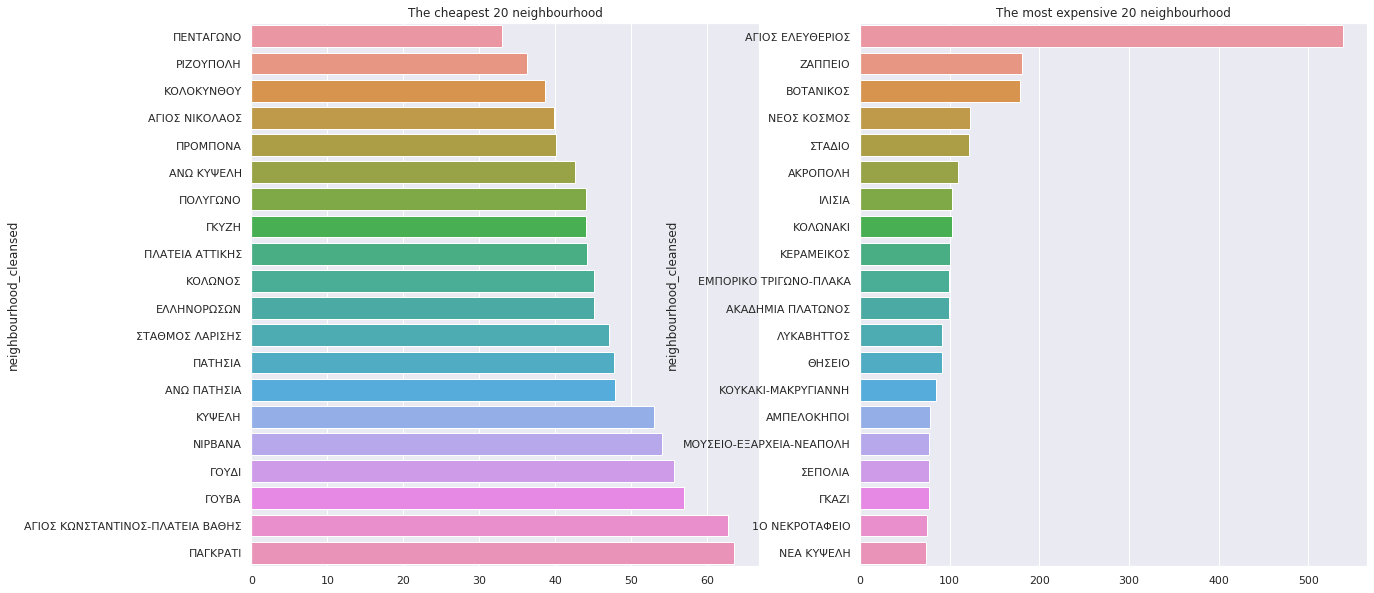

In [178]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
sns.barplot(y=a.index, x=a.values, ax=ax1)
ax1.set_title('The cheapest 20 neighbourhood')

ax2 = fig.add_subplot(122)
sns.barplot(y=d.index, x=d.values, ax=ax2)
ax2.set_title('The most expensive 20 neighbourhood')
plt.show()

In [179]:
#a = analysis.groupby(['neighbourhood_group_cleansed', 'neighbourhood_cleansed'])['price'].mean().sort_values(ascending=False).head(50)
#a = a.reset_index()
#a

In [180]:
analysis.drop(analysis[(analysis['price'] >analysis.price.mean()+2500) ].index, inplace=True)

In [181]:
analysis

neighbourhood_cleansed  ... popularity
6055  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  ...       0.35
3517                            ΘΗΣΕΙΟ  ...       1.85
7641               ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ  ...       1.85
8991            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  ...       1.85
9122  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  ...       1.85
...                                ...  ...        ...
2330                       ΝΕΟΣ ΚΟΣΜΟΣ  ...       0.00
4314                           ΝΙΡΒΑΝΑ  ...       0.00
2828                       ΝΕΟΣ ΚΟΣΜΟΣ  ...       0.00
3528  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  ...       0.00
1290            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  ...       0.00

[9651 rows x 17 columns]

In [182]:
analysis.shape

(9651, 17)

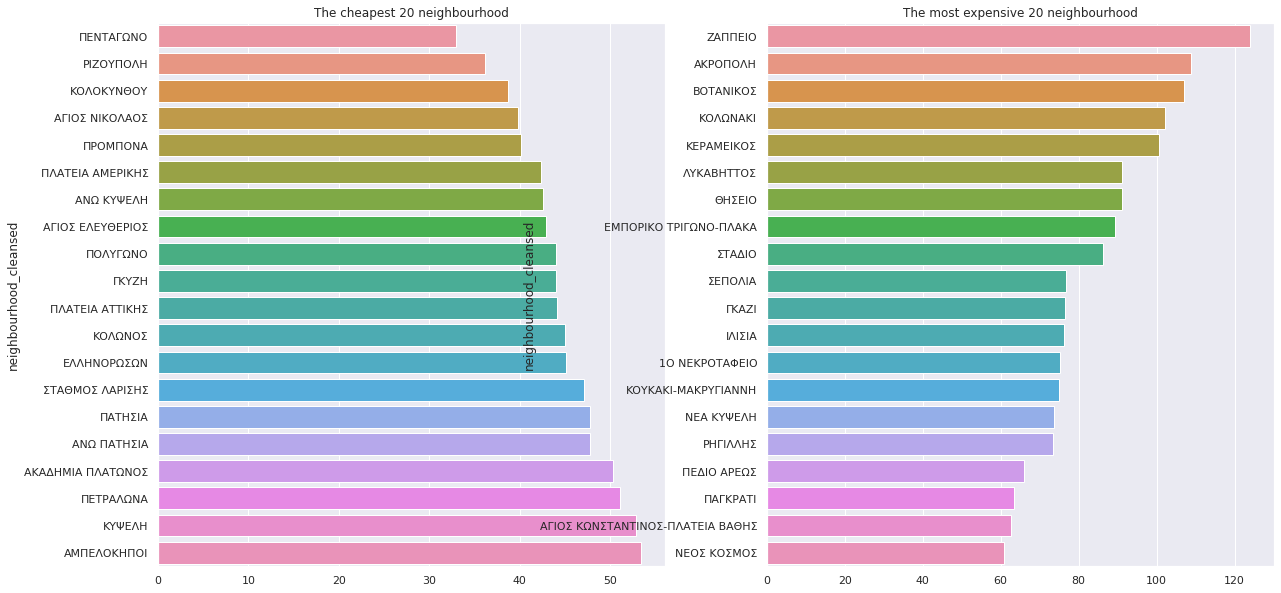

In [183]:
a = analysis.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True).head(20)
d = analysis.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(20)

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
sns.barplot(y=a.index, x=a.values, ax=ax1)
ax1.set_title('The cheapest 20 neighbourhood')

ax2 = fig.add_subplot(122)
sns.barplot(y=d.index, x=d.values, ax=ax2)
ax2.set_title('The most expensive 20 neighbourhood')
plt.show()

In [184]:
#plt.figure(figsize=(12, 6))
#df_pivot = analysis.pivot_table(values='price', index='room_type', columns='neighbourhood_group_cleansed', aggfunc='mean')
#sns.heatmap(df_pivot, annot=True, fmt='.1f', cmap='Blues')
#plt.suptitle('Mean Price')
#plt.plot()

In [185]:
analysis_pop = analysis[analysis['popularity']>0]
analysis_pop[['popularity']].describe()

popularity
count  7879.000000
mean      7.309767
std       7.683845
min       0.020000
25%       1.663800
50%       4.791800
75%      10.547050
max      93.386200

In [186]:
#Make a subgroup with Top 25% popularity score
top25_pop = analysis[analysis['popularity']>pop_threshold_25] 
top25_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2416 entries, 6978 to 9015
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_cleansed        2416 non-null   object 
 1   neighbourhood_group_cleansed  2416 non-null   object 
 2   latitude                      2416 non-null   float64
 3   longitude                     2416 non-null   float64
 4   host_is_superhost             2416 non-null   int64  
 5   room_type                     2416 non-null   object 
 6   accommodates                  2416 non-null   int64  
 7   bathrooms_text                2415 non-null   object 
 8   bedrooms                      2416 non-null   float64
 9   beds                          2416 non-null   float64
 10  price                         2416 non-null   float64
 11  availability_365              2416 non-null   int64  
 12  minimum_nights                2416 non-null   int64  
 13  

In [187]:
dftop = pd.DataFrame(top25_pop)
dftop.shape

(2416, 17)

In [188]:
top25_pop[['neighbourhood_cleansed','room_type', 'bathrooms_text']].describe()

neighbourhood_cleansed        room_type bathrooms_text
count                     2416             2416           2415
unique                      44                4             17
top     ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  Entire home/apt         1 bath
freq                       581             2286           1853

In [189]:
top25_pop['bathrooms_text'].unique()

array(['1 bath', '1 private bath', nan, '2 baths', '3 baths',
       '1 shared bath', '1.5 baths', '2.5 baths', '1.5 shared baths',
       'Half-bath', '4 baths', '4.5 baths', '3.5 baths', '2 shared baths',
       '0 shared baths', '6 baths', '0 baths', '3 shared baths'],
      dtype=object)

In [190]:
#Make a new column for the number of bathroom and whether it is shared or not
half_bath = ['Half-bath', 'Shared half-bath', 'Private half-bath']
top25_pop["bathrooms"] = top25_pop["bathrooms_text"].str.extract('(\d*\.\d+|\d+)', expand=False).astype(float)
top25_pop["bathrooms"] = np.where(top25_pop["bathrooms_text"].isin(half_bath), 0.5, top25_pop["bathrooms"])

top25_pop["bathrooms_share"] = np.where(top25_pop["bathrooms_text"].str.contains('shared|Shared'), 1, 0)
top25_pop["bathrooms_share"] = np.where(top25_pop["bathrooms_text"].str.contains('0'), 0, top25_pop['bathrooms_share'])


In [191]:
top25_pop = top25_pop.fillna(0)
top25_pop.dtypes

neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
host_is_superhost                 int64
room_type                        object
accommodates                      int64
bathrooms_text                   object
bedrooms                        float64
beds                            float64
price                           float64
availability_365                  int64
minimum_nights                    int64
maximum_nights                    int64
review_scores_rating            float64
reviews_per_month               float64
popularity                      float64
bathrooms                       float64
bathrooms_share                   int64
dtype: object

In [192]:
top25_pop.sort_values(by=['bathrooms']).head(100)

neighbourhood_cleansed  ... bathrooms_share
690                            ΚΟΛΩΝΟΣ  ...               0
7310            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  ...               0
2435                           ΖΑΠΠΕΙΟ  ...               0
7008  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  ...               0
5627          ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ  ...               0
...                                ...  ...             ...
3498               ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ  ...               0
6058                           ΠΑΤΗΣΙΑ  ...               0
8941  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  ...               0
750                        ΝΕΟΣ ΚΟΣΜΟΣ  ...               0
5709  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  ...               0

[100 rows x 19 columns]

In [193]:
new_pop = top25_pop[['host_is_superhost','latitude','longitude','neighbourhood_group_cleansed','neighbourhood_cleansed','room_type', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights','availability_365','review_scores_rating', 'reviews_per_month', 'bathrooms', 'bathrooms_share','popularity', 'price']]
new_pop.head(5)
#new_pop['neighbourhood_group_cleansed'].unique()


host_is_superhost   latitude  ...  popularity price
6978                  1  37.968080  ...       11.65  59.0
3931                  1  37.959587  ...       11.90  70.0
8788                  1  37.965652  ...       11.55  72.0
8321                  0  37.964360  ...       11.60  61.0
7831                  1  37.978760  ...       12.00  91.0

[5 rows x 18 columns]

In [194]:
new_pop.describe()

host_is_superhost     latitude  ...   popularity        price
count        2416.000000  2416.000000  ...  2416.000000  2416.000000
mean            0.626242    37.977353  ...    16.610014    62.577401
std             0.483901     0.012011  ...     7.352641    62.378692
min             0.000000    37.952504  ...     8.758400     7.000000
25%             0.000000    37.967480  ...    11.169000    35.000000
50%             1.000000    37.976810  ...    14.611600    48.000000
75%             1.000000    37.983545  ...    19.840025    70.000000
max             1.000000    38.028770  ...    93.386200  1000.000000

[8 rows x 15 columns]

In [195]:
new_pop['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

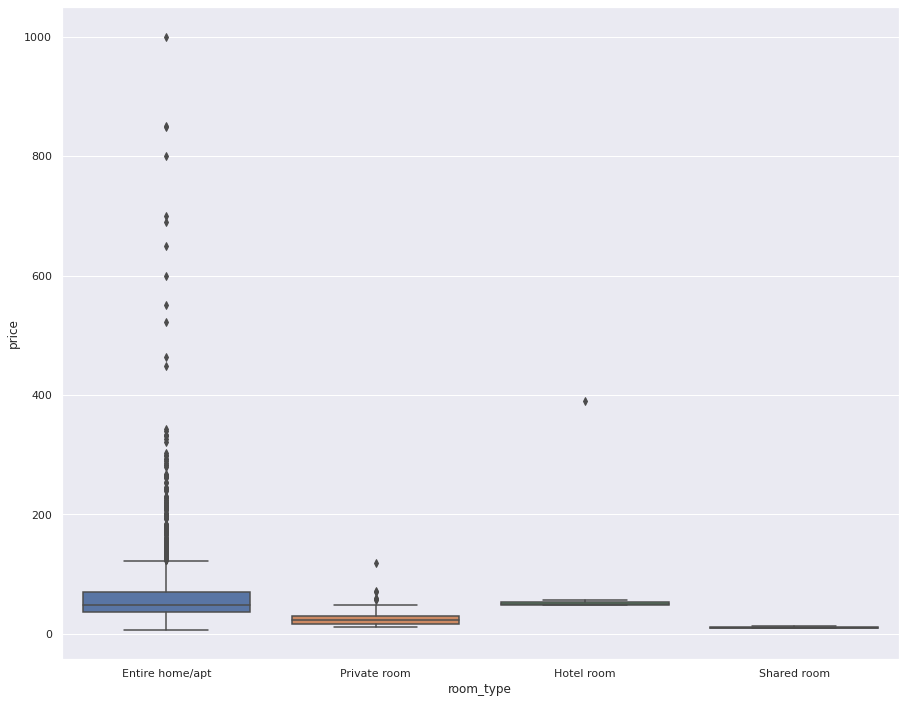

In [196]:
sns.boxplot(data=new_pop, y='price', x='room_type', orient='v')
plt.show()

In [197]:
print('Non available accommodation: ',
      new_pop.loc[new_pop['availability_365'] == 0].shape[0])

Non available accommodation:  62


minimum_nights max value  1000
minimum_nights min value  1


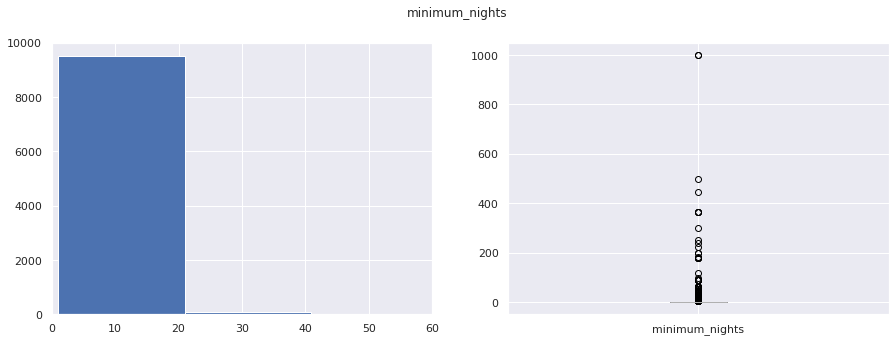

In [198]:
print('minimum_nights max value ', df['minimum_nights'].max())
print('minimum_nights min value ', df['minimum_nights'].min())
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df['minimum_nights'].hist(ax=ax[0], bins=50)
df.boxplot('minimum_nights', ax=ax[1])
fig.suptitle('minimum_nights')
ax[0].set_xlim(0, 60)
plt.show()

In [199]:
analysis['minimum_nights'].sort_values(ascending=False).head(20)

42      1000
3083    1000
137      444
3260     365
5303     365
6399     365
256      365
242      300
4205     250
4448     240
620      222
5582     201
7028     200
627      182
6280     180
4399     180
5071     180
1349     180
5363     120
4773     100
Name: minimum_nights, dtype: int64

In [200]:
analysis[['minimum_nights']].describe()

minimum_nights
count     9651.000000
mean         3.182261
std         18.876721
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max       1000.000000

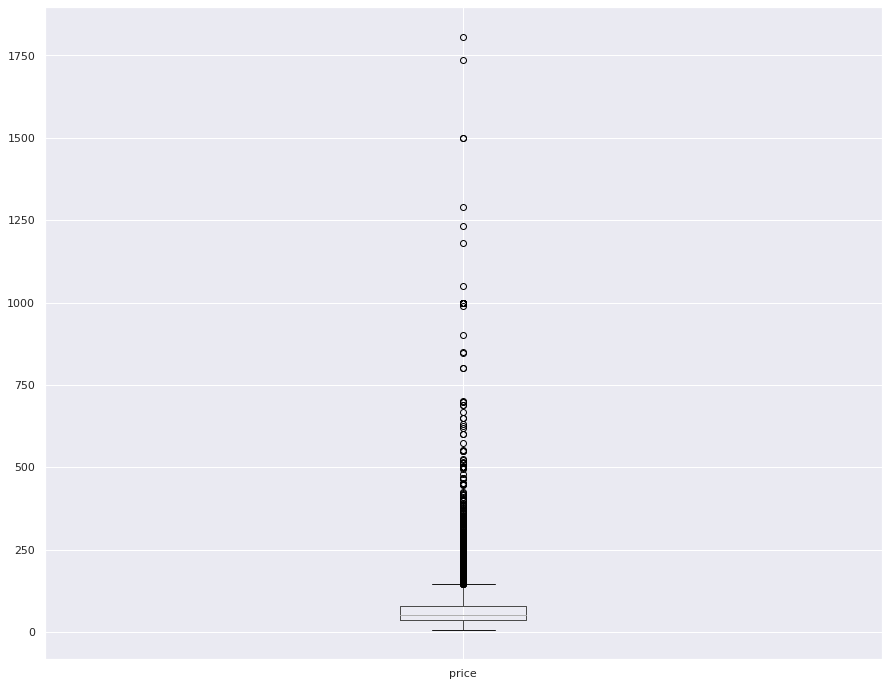

In [201]:
analysis.boxplot(column="price")

In [202]:
new_pop = new_pop.loc[new_pop['minimum_nights'] <= 3]
new_pop.reset_index(drop=True, inplace=True)

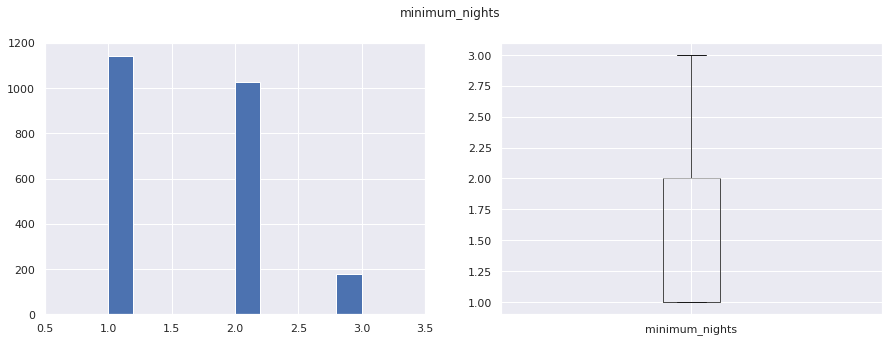

In [203]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
new_pop['minimum_nights'].hist(ax=ax[0])
new_pop.boxplot('minimum_nights')
fig.suptitle('minimum_nights')
ax[0].set_xlim(0.5, 3.5)
plt.show()

minimum_nights max value  1000
minimum_nights min value  1


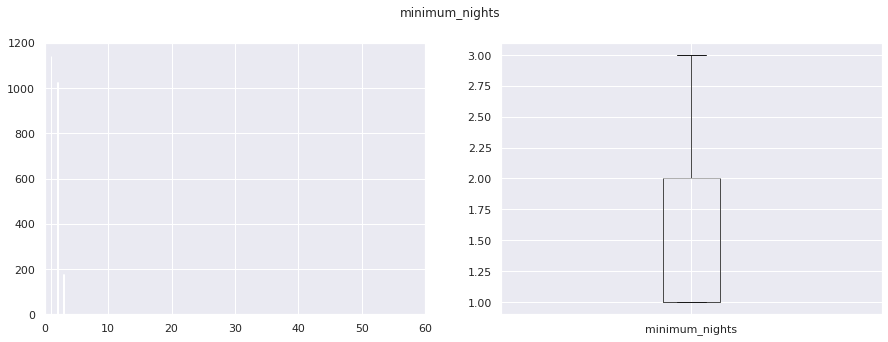

In [204]:
print('minimum_nights max value ', df['minimum_nights'].max())
print('minimum_nights min value ', df['minimum_nights'].min())
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
new_pop['minimum_nights'].hist(ax=ax[0], bins=50)
new_pop.boxplot('minimum_nights', ax=ax[1])
fig.suptitle('minimum_nights')
ax[0].set_xlim(0, 60)
plt.show()

In [205]:
new_pop.describe()

host_is_superhost     latitude  ...   popularity        price
count        2352.000000  2352.000000  ...  2352.000000  2352.000000
mean            0.627126    37.977382  ...    16.693779    62.585034
std             0.483672     0.011927  ...     7.385516    62.264761
min             0.000000    37.952504  ...     8.758400     7.000000
25%             0.000000    37.967575  ...    11.200000    35.000000
50%             1.000000    37.976840  ...    14.715200    48.000000
75%             1.000000    37.983510  ...    19.909200    70.000000
max             1.000000    38.028770  ...    93.386200  1000.000000

[8 rows x 15 columns]

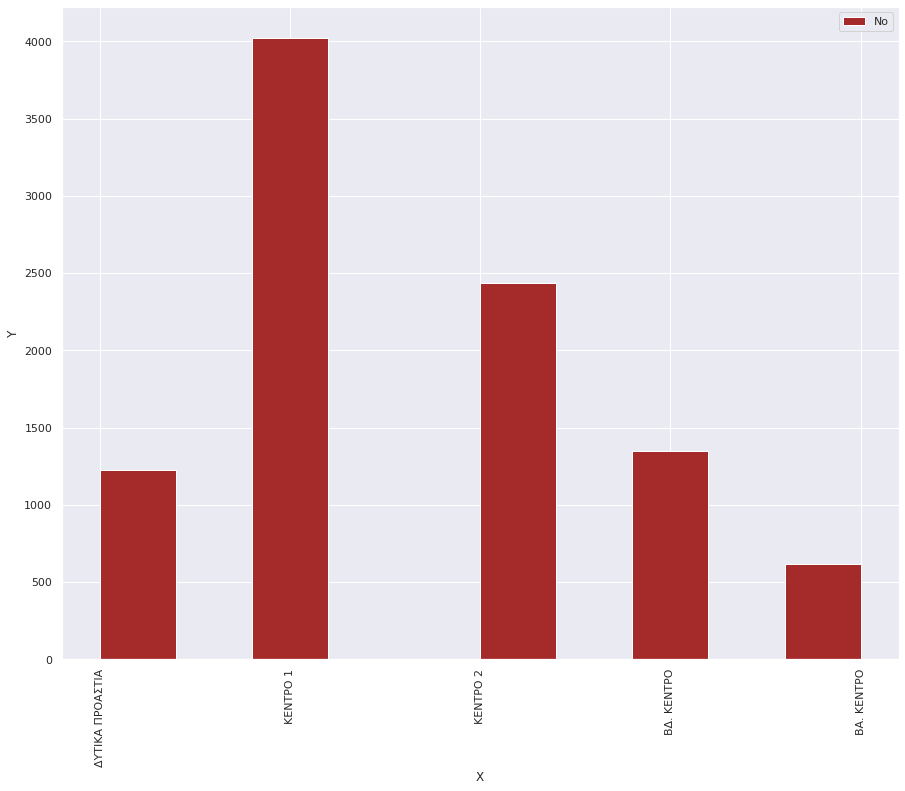

In [206]:
#sns
sns.set() 
plt.xticks(rotation='vertical')
plt.hist(analysis['neighbourhood_group_cleansed'], color='brown', label='No')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend() 
plt.show()

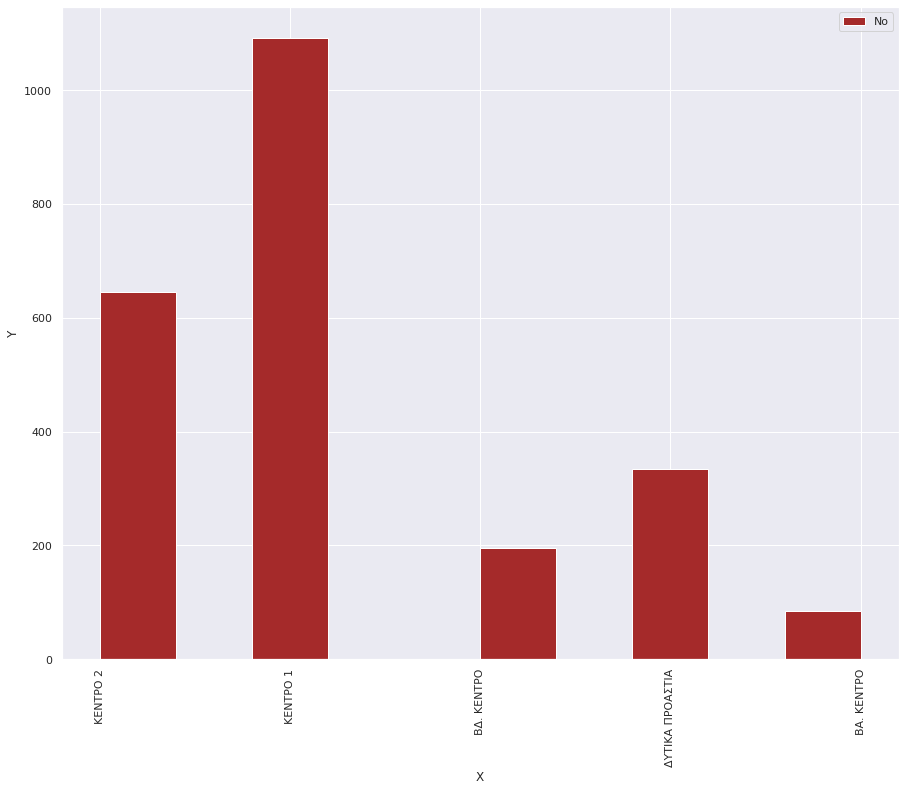

In [207]:
#sns
sns.set() 
plt.xticks(rotation='vertical')
plt.hist(new_pop['neighbourhood_group_cleansed'], color='brown', label='No')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend() 
plt.show()

Text(0.5, 1.0, 'Numbers in Each Neigbourhoods')

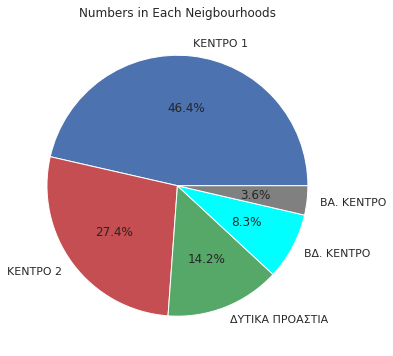

In [208]:
plt.figure(figsize=(6,6))
numbers = new_pop['neighbourhood_group_cleansed'].value_counts()
plt.pie(numbers.values, labels=numbers.index, colors=['b', 'r', 'g', 'cyan', 'gray'], autopct='%1.1f%%')
plt.title('Numbers in Each Neigbourhoods')

In [209]:
new_pop['neighbourhood_cleansed'] = new_pop['neighbourhood_cleansed'].astype('category')
new_pop['room_type'] = new_pop['room_type'].astype('category')
new_pop['neighbourhood_group_cleansed'] = new_pop['neighbourhood_group_cleansed'].astype('category')
new_pop['room_type'] = new_pop['room_type'].astype('category')
new_pop['price'] = new_pop['price'].astype(str)
new_pop['price'] = new_pop['price'].str.replace(',', '')
new_pop['price'] = new_pop['price'].str.replace('$', '')
new_pop['price'] = new_pop['price'].astype(float)
new_pop.dtypes 

host_is_superhost                  int64
latitude                         float64
longitude                        float64
neighbourhood_group_cleansed    category
neighbourhood_cleansed          category
room_type                       category
accommodates                       int64
bedrooms                         float64
beds                             float64
minimum_nights                     int64
maximum_nights                     int64
availability_365                   int64
review_scores_rating             float64
reviews_per_month                float64
bathrooms                        float64
bathrooms_share                    int64
popularity                       float64
price                            float64
dtype: object

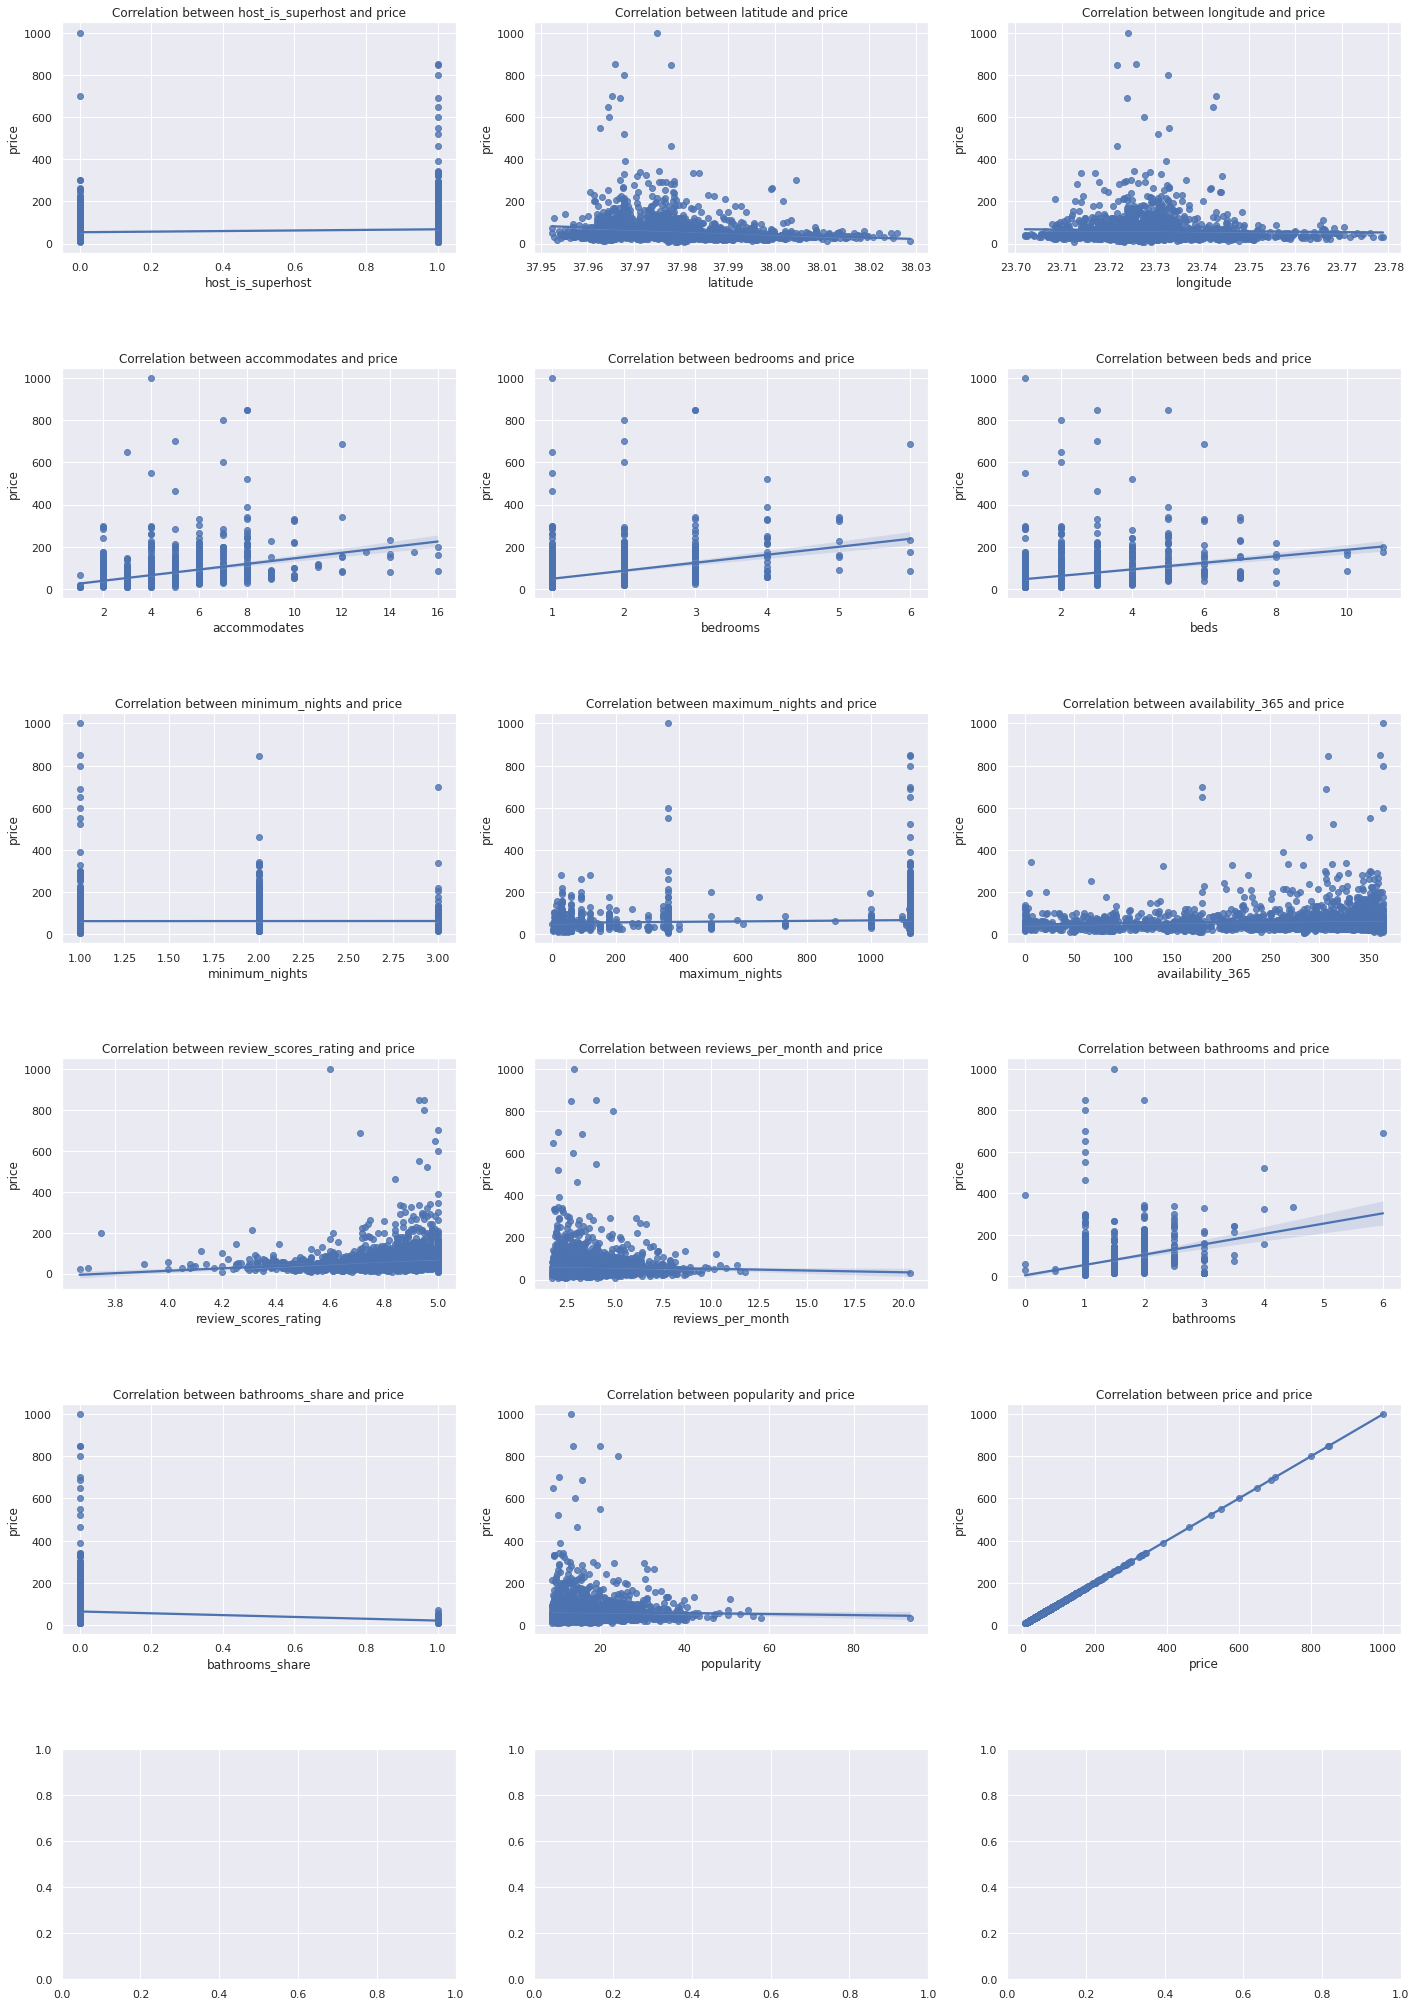

In [210]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = new_pop.select_dtypes(include=numerics)
nrows = int(len(newdf.columns) / 3) + 1
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(24, 6*nrows))
fig.subplots_adjust(hspace=0.5)

for ax, name in zip(axes.flatten(), newdf.columns):
  
  sns.regplot(x=name, y='price', data=newdf, ax=ax)
  ax.set_title(f"Correlation between {name} and price")

plt.show()

In [211]:
new_pop.describe()

host_is_superhost     latitude  ...   popularity        price
count        2352.000000  2352.000000  ...  2352.000000  2352.000000
mean            0.627126    37.977382  ...    16.693779    62.585034
std             0.483672     0.011927  ...     7.385516    62.264761
min             0.000000    37.952504  ...     8.758400     7.000000
25%             0.000000    37.967575  ...    11.200000    35.000000
50%             1.000000    37.976840  ...    14.715200    48.000000
75%             1.000000    37.983510  ...    19.909200    70.000000
max             1.000000    38.028770  ...    93.386200  1000.000000

[8 rows x 15 columns]

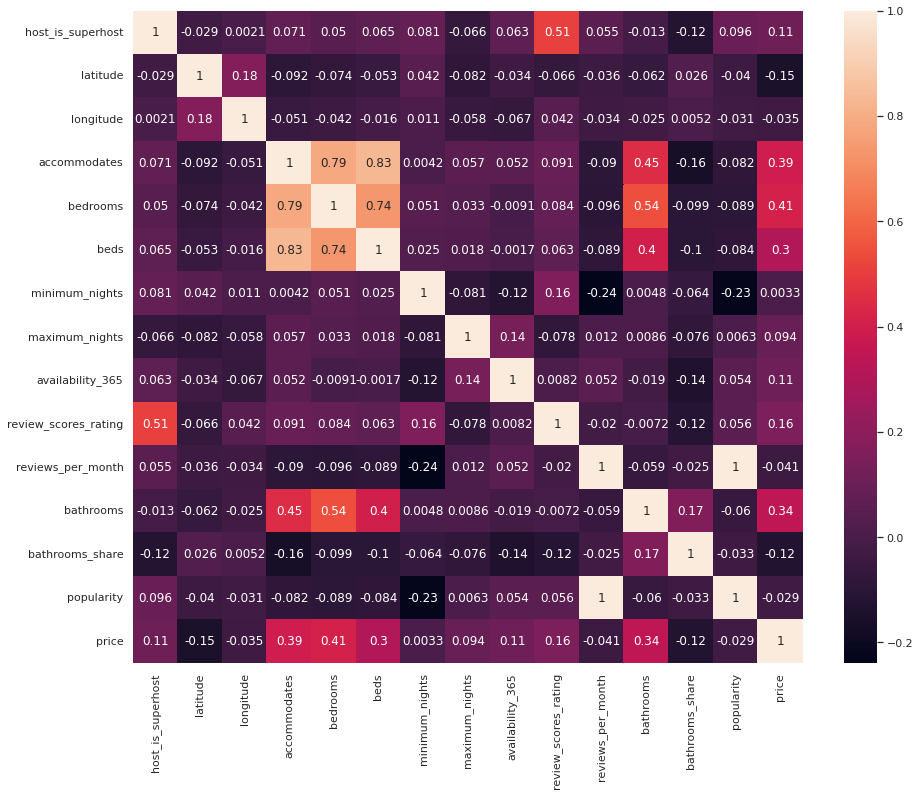

In [212]:
correlation_mat = new_pop.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

In [213]:
new_pop.info

<bound method DataFrame.info of       host_is_superhost   latitude  ...  popularity  price
0                     1  37.968080  ...     11.6500   59.0
1                     1  37.959587  ...     11.9000   70.0
2                     1  37.965652  ...     11.5500   72.0
3                     0  37.964360  ...     11.6000   61.0
4                     1  37.978760  ...     12.0000   91.0
...                 ...        ...  ...         ...    ...
2347                  0  37.966698  ...      9.0000   55.0
2348                  0  38.007370  ...      8.7584   47.0
2349                  0  37.981040  ...     13.6500  200.0
2350                  0  37.976410  ...     11.5810   26.0
2351                  0  37.983490  ...      9.5787   22.0

[2352 rows x 18 columns]>

In [214]:
new_pop.groupby("neighbourhood_group_cleansed")["price"].mean()

neighbourhood_group_cleansed
ΒΑ. ΚΕΝΤΡΟ         43.294118
ΒΔ. ΚΕΝΤΡΟ         43.502564
ΔΥΤΙΚΑ ΠΡΟΑΣΤΙΑ    51.594030
ΚΕΝΤΡΟ 1           70.756410
ΚΕΝΤΡΟ 2           62.770543
Name: price, dtype: float64

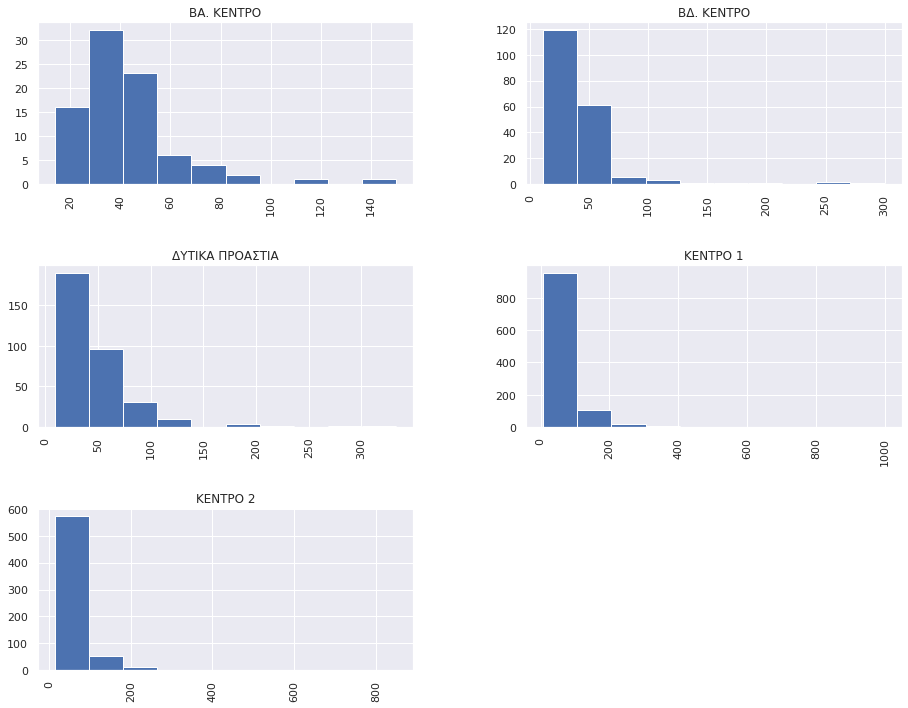

In [215]:
#Plotting histograms for
new_pop.hist(by='neighbourhood_group_cleansed',column='price')
plt.show()

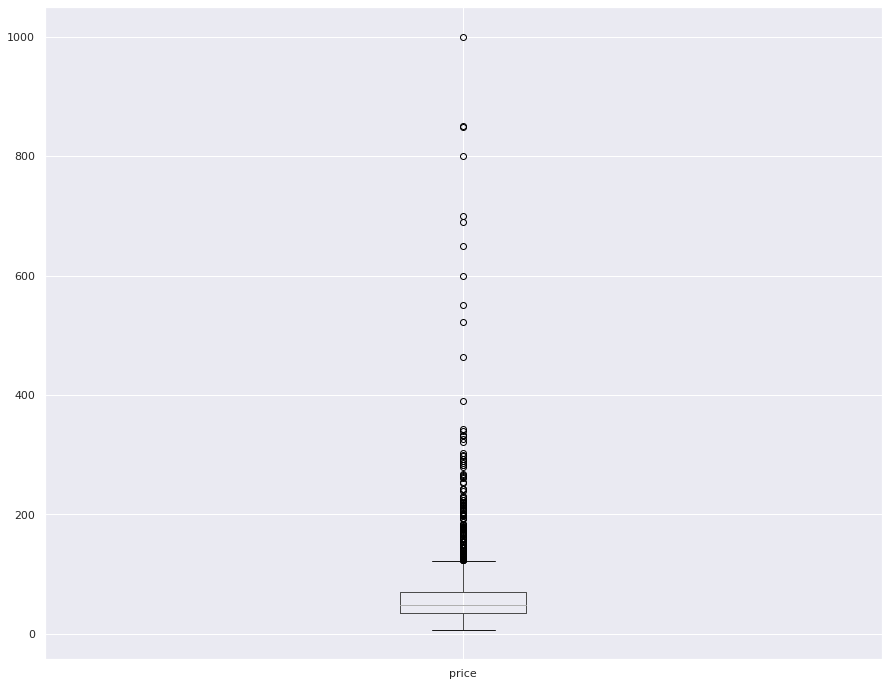

In [216]:
new_pop.boxplot(column="price")

In [217]:
new_pop["price"].skew()

6.7980664908439135

In [218]:
new_pop["price"].quantile(0.995)

354.51499999999487

In [219]:
new_pop = new_pop[new_pop["price"]<new_pop["price"].quantile(0.995)].reset_index(drop=True)

In [220]:
new_pop["price"].skew()

2.854129915206227

In [221]:
new_pop.describe()

host_is_superhost     latitude  ...   popularity        price
count        2340.000000  2340.000000  ...  2340.000000  2340.000000
mean            0.626068    37.977427  ...    16.704239    59.460684
std             0.483949     0.011936  ...     7.395943    42.794594
min             0.000000    37.952504  ...     8.758400     7.000000
25%             0.000000    37.967588  ...    11.200000    35.000000
50%             1.000000    37.976880  ...    14.723800    48.000000
75%             1.000000    37.983545  ...    19.909200    69.000000
max             1.000000    38.028770  ...    93.386200   343.000000

[8 rows x 15 columns]

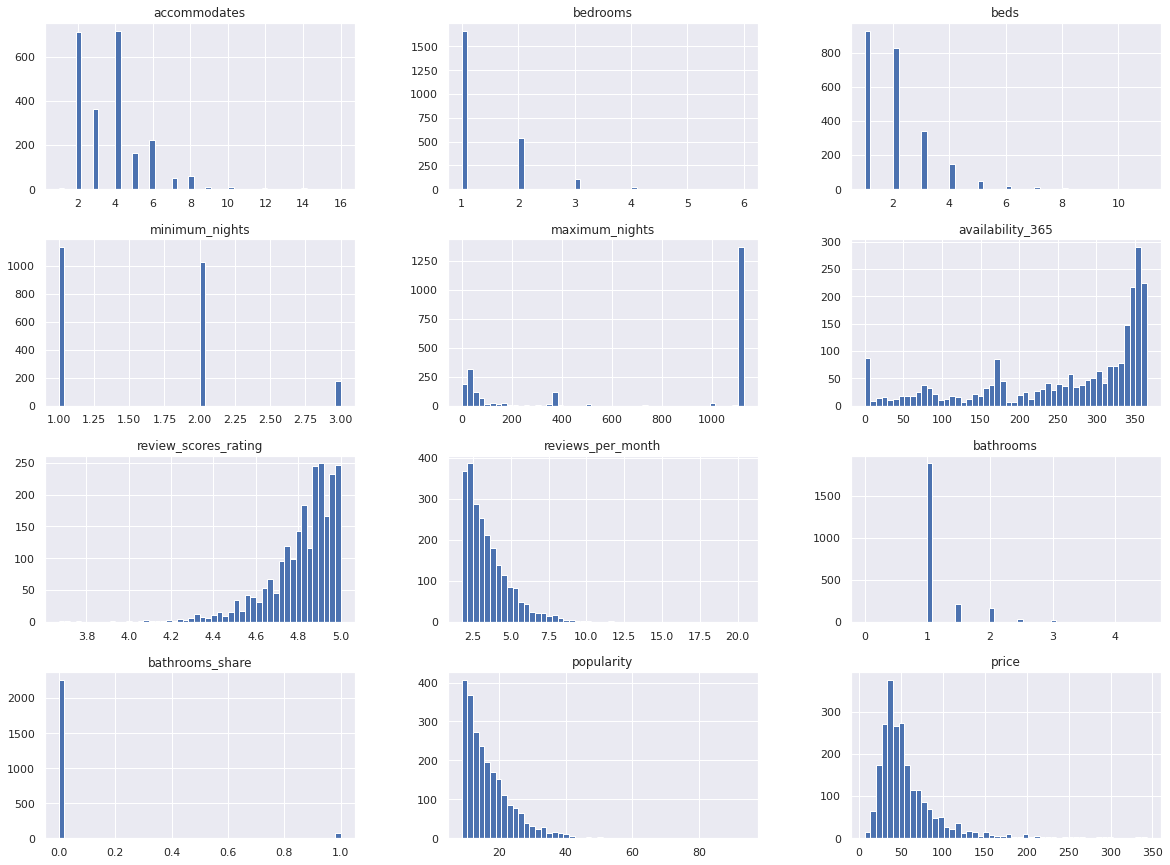

In [222]:
try:
    new_pop.iloc[:,6:].hist(bins=50, figsize=(20,15))
    plt.show()
except AttributeError:
    pass

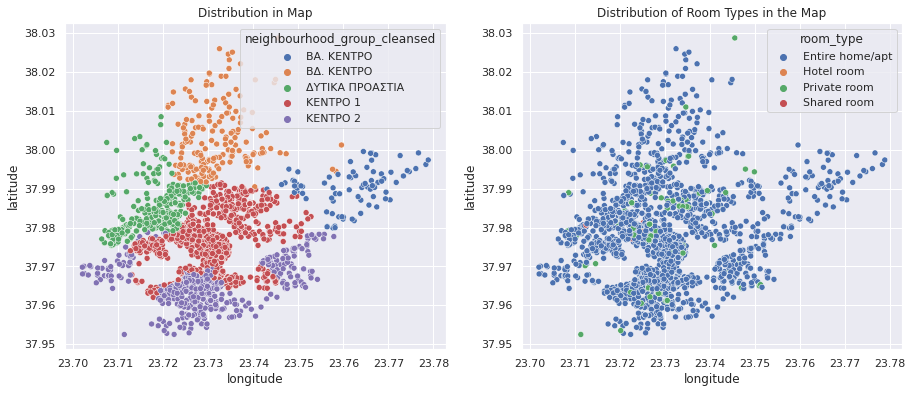

In [223]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
sns.scatterplot(new_pop['longitude'], new_pop['latitude'], hue=new_pop['neighbourhood_group_cleansed'], ax=ax1)
ax1.set_title('Distribution in Map')

ax2 = fig.add_subplot(122)
sns.scatterplot(new_pop['longitude'],new_pop['latitude'], hue=new_pop['room_type'], ax=ax2)
ax2.set_title('Distribution of Room Types in the Map')

plt.show()

In [224]:
'''latitudes = np.array(new_pop['latitude'])
longitudes = np.array(new_pop['longitude'])
la_mean = latitudes.mean()
lo_mean = longitudes.mean()
locations = list(zip(latitudes, longitudes))

m = folium.Map(location=[la_mean, lo_mean], zoom_start= 11.5)
FastMarkerCluster(data=locations).add_to(m)
m'''

"latitudes = np.array(new_pop['latitude'])\nlongitudes = np.array(new_pop['longitude'])\nla_mean = latitudes.mean()\nlo_mean = longitudes.mean()\nlocations = list(zip(latitudes, longitudes))\n\nm = folium.Map(location=[la_mean, lo_mean], zoom_start= 11.5)\nFastMarkerCluster(data=locations).add_to(m)\nm"

In [225]:
new_pop.dtypes

host_is_superhost                  int64
latitude                         float64
longitude                        float64
neighbourhood_group_cleansed    category
neighbourhood_cleansed          category
room_type                       category
accommodates                       int64
bedrooms                         float64
beds                             float64
minimum_nights                     int64
maximum_nights                     int64
availability_365                   int64
review_scores_rating             float64
reviews_per_month                float64
bathrooms                        float64
bathrooms_share                    int64
popularity                       float64
price                            float64
dtype: object

In [226]:
from sklearn.preprocessing import LabelEncoder

categorical = new_pop.select_dtypes(include=['category']).columns

for i in categorical:
  new_pop[i] = LabelEncoder().fit_transform(new_pop[i])


new_pop.dtypes

host_is_superhost                 int64
latitude                        float64
longitude                       float64
neighbourhood_group_cleansed      int64
neighbourhood_cleansed            int64
room_type                         int64
accommodates                      int64
bedrooms                        float64
beds                            float64
minimum_nights                    int64
maximum_nights                    int64
availability_365                  int64
review_scores_rating            float64
reviews_per_month               float64
bathrooms                       float64
bathrooms_share                   int64
popularity                      float64
price                           float64
dtype: object

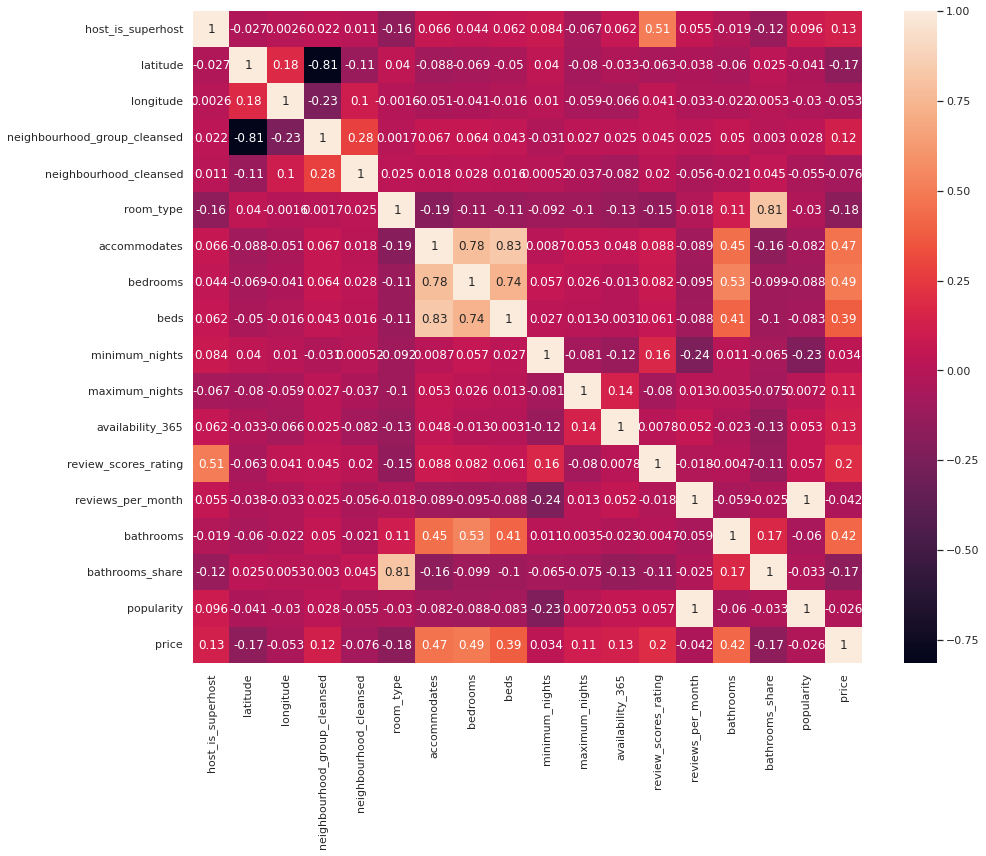

In [227]:
correlation_mat = new_pop.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

In [228]:
new_pop.describe()

host_is_superhost     latitude  ...   popularity        price
count        2340.000000  2340.000000  ...  2340.000000  2340.000000
mean            0.626068    37.977427  ...    16.704239    59.460684
std             0.483949     0.011936  ...     7.395943    42.794594
min             0.000000    37.952504  ...     8.758400     7.000000
25%             0.000000    37.967588  ...    11.200000    35.000000
50%             1.000000    37.976880  ...    14.723800    48.000000
75%             1.000000    37.983545  ...    19.909200    69.000000
max             1.000000    38.028770  ...    93.386200   343.000000

[8 rows x 18 columns]

In [229]:
#from sklearn.model_selection import cross_val_score


In [230]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = new_pop.drop(columns=['price'])
y = new_pop['price']

columns = X.columns
scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"There are {X_train.shape[0]} traning data")
print(f"There are {X_test.shape[0]} test data")


X.head()

There are 1872 traning data
There are 468 test data


host_is_superhost  latitude  ...  bathrooms_share  popularity
0           0.772832 -0.783271  ...        -0.185695   -0.683526
1           0.772832 -1.494972  ...        -0.185695   -0.649716
2           0.772832 -0.986734  ...        -0.185695   -0.697050
3          -1.293942 -1.095002  ...        -0.185695   -0.690288
4           0.772832  0.111696  ...        -0.185695   -0.636193

[5 rows x 17 columns]

In [231]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(5, metric="euclidean")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Absolute Error: {}".format(rmse))
print("R2 score: {}".format(r2))

Mean Squared Error: 989.5865811965813
Mean Absolute Error: 20.47136752136752
Root Mean Absolute Error: 31.457695103051993
R2 score: 0.36749111990271355


In [232]:
prediction_dictionaries = {'KNN-Default': y_pred}

In [233]:

prediction_list = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'KNN-Default': y_pred.flatten()}).head(20)
prediction_list.set_index('Actual Values', inplace=True)
prediction_list

KNN-Default
Actual Values             
65.0                  54.8
60.0                  55.4
36.0                  48.8
35.0                  53.2
32.0                  61.6
37.0                  43.4
40.0                  50.4
39.0                  31.6
41.0                  43.8
75.0                  51.6
55.0                  63.2
23.0                  28.8
44.0                  48.0
21.0                  24.8
24.0                  52.0
25.0                  30.8
73.0                  73.6
58.0                  73.2
49.0                  48.0
20.0                  37.4

In [234]:
error_dict = {'KNN Default': [mse, r2]}
error_list = pd.DataFrame()
error_list['KNN Default'] = [mse, r2]
error_list.reset_index(inplace=True, drop=True)
#error_list.rename(columns={0: 'MSE KNN Default'}, inplace=True)
error_list.index =['Mean Squared Error', 'R2 Score']
error_list.T

Mean Squared Error  R2 Score
KNN Default          989.586581  0.367491

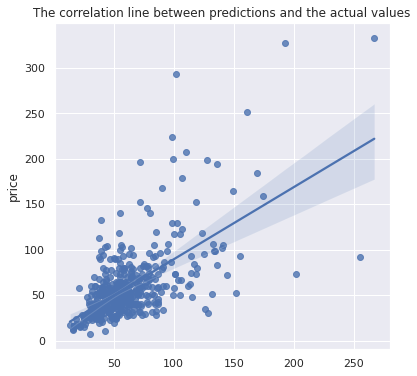

In [235]:
plt.figure(figsize=(6,6))
sns.regplot(y_pred, y_test)
plt.title("The correlation line between predictions and the actual values")
plt.show()

In [236]:
def plot_all_r2():
  length = len(prediction_dictionaries)
  n_col = 2
  if length < 2:
    n_col = length % 2
  
  nrow = 1
  if(length > 2):
    nrow = int(length / 2) 
    if length % 2 != 0:
      nrow+=1
  
  fig, axes = plt.subplots(nrow, n_col, figsize=( 16, 3 * length))
  for ax, key in zip(axes.flatten(), prediction_dictionaries.keys()):
    sns.regplot(prediction_dictionaries[key], y_test, ax=ax)
    ax.set_title("The correlation line in {}".format(key))
  plt.show()

In [237]:
from sklearn.model_selection import GridSearchCV
param_grid = {'p': [1, 2],  
              'n_neighbors' : [ 5, 10, 15]
              } 

grid_knn = GridSearchCV(KNeighborsRegressor(n_jobs=-1), param_grid, refit = True, verbose = 10, n_jobs=-1, cv=5,scoring="neg_mean_squared_error") 

grid_knn.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15], 'p': [1, 2]},
             scoring='neg_mean_squared_error', verbose=10)

In [238]:

print(f"Best parameters are {grid_knn.best_params_}") 
print("Best score is {}".format(grid_knn.best_score_ * -1))
print("Best model is {}".format(grid_knn.best_estimator_))
#print("The score for hyperparameter tuning are {}".format(gr

Best parameters are {'n_neighbors': 15, 'p': 1}
Best score is 1148.3882564102564
Best model is KNeighborsRegressor(n_jobs=-1, n_neighbors=15, p=1)


In [239]:
knr_best = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=15, p=1,
                    weights='uniform')
knr_best.fit(X_train, y_train)
y_pred_best = knr_best.predict(X_test)

mse_knn_best = mean_squared_error(y_pred_best, y_test)
mae_knn_best = mean_absolute_error(y_pred, y_test)
rmse_knn_best = np.sqrt(mse)
r2_knn_best = r2_score(y_test, y_pred_best)

print("Mean Squared Error: {}".format(mse_knn_best))
print("Mean Absolute Error: {}".format(mae_knn_best))
print("Root Mean Absolute Error: {}".format(rmse_knn_best))
print("R2 score: {}".format(r2_knn_best))

Mean Squared Error: 871.4505508072175
Mean Absolute Error: 20.47136752136752
Root Mean Absolute Error: 31.457695103051993
R2 score: 0.4429995086587166


In [240]:
prediction_dictionaries['Knn-Best']   = y_pred_best

In [241]:
prediction_list['KNN-Best'] = y_pred_best[:20]
prediction_list

KNN-Default   KNN-Best
Actual Values                        
65.0                  54.8  54.000000
60.0                  55.4  47.666667
36.0                  48.8  55.133333
35.0                  53.2  48.933333
32.0                  61.6  60.866667
37.0                  43.4  39.000000
40.0                  50.4  54.333333
39.0                  31.6  31.400000
41.0                  43.8  45.733333
75.0                  51.6  45.800000
55.0                  63.2  61.666667
23.0                  28.8  23.666667
44.0                  48.0  48.933333
21.0                  24.8  44.600000
24.0                  52.0  55.333333
25.0                  30.8  45.066667
73.0                  73.6  76.000000
58.0                  73.2  77.200000
49.0                  48.0  46.133333
20.0                  37.4  35.666667

In [242]:
error_list['MSE KNN-Best'] = [mse_knn_best, r2_knn_best]
error_list.T

Mean Squared Error  R2 Score
KNN Default           989.586581  0.367491
MSE KNN-Best          871.450551  0.443000

In [243]:
from sklearn.svm import LinearSVR, SVR
clf_svr = LinearSVR()
clf_svr.fit(X_train, y_train)

preds_svr = clf_svr.predict(X_test)

mse_svr = mean_squared_error(preds_svr, y_test)
mae_svr = mean_absolute_error(preds_svr, y_test)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, preds_svr)

print("Mean Squared Error: {}".format(mse_svr))
print("Mean Absolute Error: {}".format(mae_svr))
print("Root Mean Absolute Error: {}".format(rmse_svr))
print("R2 Score: {}".format(r2_svr))

Mean Squared Error: 972.3626029165225
Mean Absolute Error: 18.683332924581595
Root Mean Absolute Error: 31.182729240984063
R2 Score: 0.3785000800278264


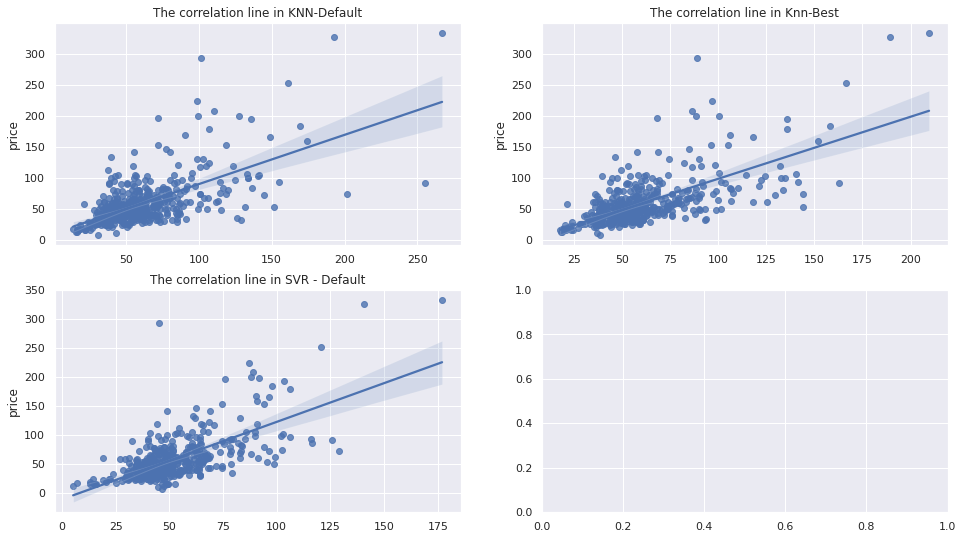

In [244]:
prediction_dictionaries['SVR - Default'] = preds_svr
plot_all_r2()

In [245]:
prediction_list['SVR-Default'] = np.array(preds_svr[:20])
prediction_list

KNN-Default   KNN-Best  SVR-Default
Actual Values                                     
65.0                  54.8  54.000000    42.843910
60.0                  55.4  47.666667    19.100339
36.0                  48.8  55.133333    40.762217
35.0                  53.2  48.933333    41.145396
32.0                  61.6  60.866667    43.158888
37.0                  43.4  39.000000    49.447384
40.0                  50.4  54.333333    56.799050
39.0                  31.6  31.400000    43.405099
41.0                  43.8  45.733333    34.621716
75.0                  51.6  45.800000    43.167105
55.0                  63.2  61.666667    65.790648
23.0                  28.8  23.666667    19.036562
44.0                  48.0  48.933333    38.247018
21.0                  24.8  44.600000    43.477698
24.0                  52.0  55.333333    44.197519
25.0                  30.8  45.066667    47.299092
73.0                  73.6  76.000000    51.751865
58.0                  73.2  77.200000    66.888384
49.0                  48.0  46.133333    41.506417
20.0                  37.4  35.666667    28.118020

In [246]:
error_list['SVR Default'] = [mse_svr, r2_svr]
error_list.T

Mean Squared Error  R2 Score
KNN Default           989.586581  0.367491
MSE KNN-Best          871.450551  0.443000
SVR Default           972.362603  0.378500

In [247]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'], 
              'dual': [True, False],
              'tol': [0.0001, 0.00001]} 

grid = GridSearchCV(LinearSVR(), param_grid, refit = True, verbose = 10, n_jobs=-1, cv=5,scoring="neg_mean_squared_error") 

grid.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LinearSVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'dual': [True, False],
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'tol': [0.0001, 1e-05]},
             scoring='neg_mean_squared_error', verbose=10)

In [248]:
print(f"Best parameters are {grid.best_params_}") 
print("Best score is {}".format(grid.best_score_ * -1))
print("Best model is {}".format(grid.best_estimator_))
print("scores {}".format(grid.cv_results_['mean_test_score']))

Best parameters are {'C': 1, 'dual': False, 'loss': 'squared_epsilon_insensitive', 'tol': 0.0001}
Best score is 1246.3050094976709
Best model is LinearSVR(C=1, dual=False, loss='squared_epsilon_insensitive')
scores [-1678.21475071 -1679.25835823 -1247.30845224 -1247.33264133
            nan            nan -1247.44761619 -1247.32706617
 -1385.84652062 -1387.23611138 -1246.3709014  -1246.3123868
            nan            nan -1246.3050095  -1246.34018351
 -1363.21583661 -1363.85920453 -1263.2668699  -1256.87193522
            nan            nan -1252.16811895 -1252.16761189
 -1353.48689549 -1355.0914164  -2082.51661601 -2124.59125117
            nan            nan -1255.27407994 -1255.2728203
 -1550.11607517 -1405.71943145 -3433.41387935 -1809.478916
            nan            nan -1255.69868923 -1255.69742344]


In [249]:
svr_best = LinearSVR(C=1, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

svr_best.fit(X_train, y_train)

preds_svr_best = svr_best.predict(X_test)

mse_svr_best = mean_squared_error(preds_svr_best, y_test)
mae_svr_best = mean_absolute_error(preds_svr_best, y_test)
rmse_svr_best = np.sqrt(mse_svr_best)
r2_svr_best = r2_score(y_test, preds_svr_best)

print("Mean Squared Error: {}".format(mse_svr_best))
print("Mean Absolute Error: {}".format(mae_svr_best))
print("Root Mean Absolute Error: {}".format(rmse_svr_best))
print("R2 Score: {}".format(r2_svr_best))

Mean Squared Error: 972.0805803644097
Mean Absolute Error: 18.680557632038816
Root Mean Absolute Error: 31.178206817654054
R2 Score: 0.378680338907634


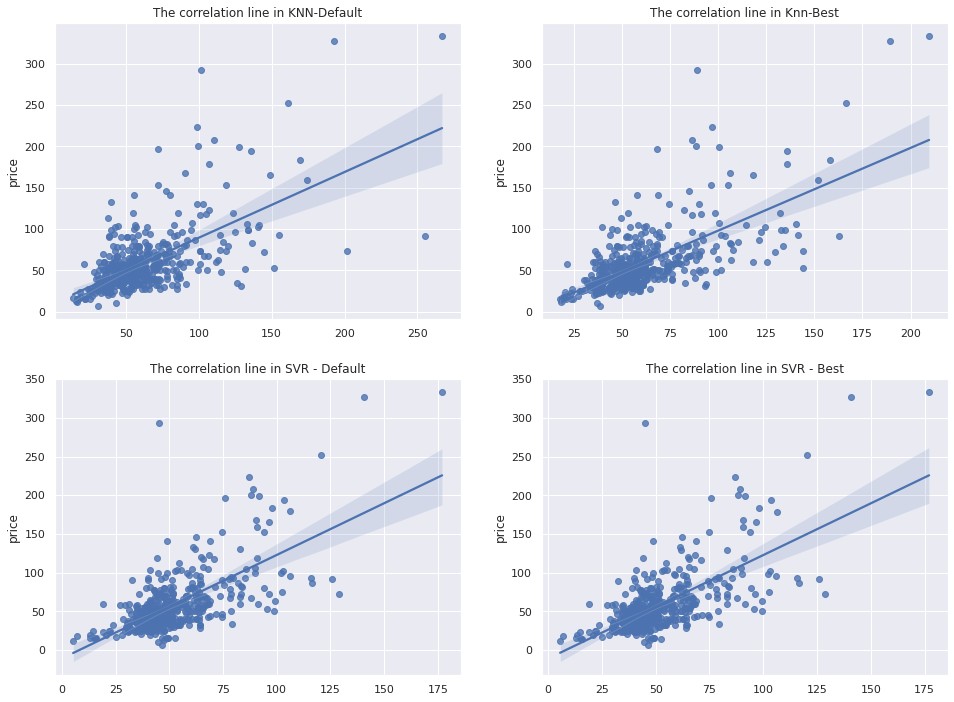

In [250]:
prediction_dictionaries['SVR - Best'] = preds_svr_best
plot_all_r2()

In [251]:
prediction_list['SVR-Best'] = np.array(preds_svr_best[:20])
prediction_list

KNN-Default   KNN-Best  SVR-Default   SVR-Best
Actual Values                                                
65.0                  54.8  54.000000    42.843910  42.949620
60.0                  55.4  47.666667    19.100339  19.081389
36.0                  48.8  55.133333    40.762217  40.511994
35.0                  53.2  48.933333    41.145396  41.159966
32.0                  61.6  60.866667    43.158888  43.228470
37.0                  43.4  39.000000    49.447384  49.366797
40.0                  50.4  54.333333    56.799050  56.615057
39.0                  31.6  31.400000    43.405099  43.367146
41.0                  43.8  45.733333    34.621716  34.750942
75.0                  51.6  45.800000    43.167105  42.989401
55.0                  63.2  61.666667    65.790648  65.631403
23.0                  28.8  23.666667    19.036562  19.042942
44.0                  48.0  48.933333    38.247018  38.158796
21.0                  24.8  44.600000    43.477698  43.421249
24.0                  52.0  55.333333    44.197519  44.230493
25.0                  30.8  45.066667    47.299092  47.377990
73.0                  73.6  76.000000    51.751865  51.732786
58.0                  73.2  77.200000    66.888384  66.775770
49.0                  48.0  46.133333    41.506417  41.365466
20.0                  37.4  35.666667    28.118020  28.307379

In [252]:
error_list['SVR Best'] = [mse_svr_best, r2_svr_best]
error_list.T

Mean Squared Error  R2 Score
KNN Default           989.586581  0.367491
MSE KNN-Best          871.450551  0.443000
SVR Default           972.362603  0.378500
SVR Best              972.080580  0.378680

In [253]:
from sklearn import tree

In [254]:
tree_model = tree.DecisionTreeRegressor()
tree_model.fit(X_train, y_train) 
tree_model_prediction = tree_model.predict(X_test)

tree_mse = metrics.mean_squared_error(y_test, tree_model_prediction)
tree_mae = metrics.mean_absolute_error(y_test, tree_model_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_r2 = metrics.r2_score(y_test, tree_model_prediction)

print("Mean Squared Error: {}".format(tree_mse))
print("Mean Absolute Error: {}".format(tree_mae))
print("Root Mean Absolute Error: {}".format(tree_rmse))
print("R2 score: {}".format(tree_r2))

Mean Squared Error: 2001.6688034188035
Mean Absolute Error: 26.71153846153846
Root Mean Absolute Error: 44.7400134490235
R2 score: -0.2793961814288157


In [255]:
parameters = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
}
tree_grid = GridSearchCV(tree_model, parameters, refit = True, verbose = 1, n_jobs=-1, cv=5, scoring="neg_mean_squared_error") 
tree_grid.fit(X, y)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=1)

In [256]:
print(f"Best parameters are {tree_grid.best_params_}") 
print("Best score is {}".format(tree_grid.best_score_ * -1))
print("Best model is {}".format(tree_grid.best_estimator_))
print("scores {}".format(tree_grid.cv_results_['mean_test_score']))

Best parameters are {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 3}
Best score is 1361.2387618133776
Best model is DecisionTreeRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=3)
scores [-1688.99060095 -1688.99060095 -1688.99060095 -1688.99060095
 -1688.99060095 -1688.99060095 -1688.99060095 -1688.99060095
 -1688.99060095 -1688.99060095 -1688.99060095 -1688.99060095
 -1688.99060095 -1688.99060095 -1688.99060095 -1688.99060095
 -1688.99060095 -1688.99060095 -1688.99060095 -1688.99060095
 -1546.01053572 -1546.01053572 -1546.01053572 -1546.01053572
 -1546.01053572 -1546.01053572 -1546.01053572 -1546.01053572
 -1546.01053572 -1546.01053572 -1546.01053572 -1546.01053572
 -1546.01053572 -1546.01053572 -1546.01053572 -1546.01053572
 -1546.01053572 -1546.01053572 -1546.01053572 -1546.01053572
 -1364.1234784  -1364.1234784  -1364.1234784  -1364.1234784
 -1364.1234784  -1364.1234784  -1364.1234784  -1364.1234784
 -1364.1234784  -1364.1234784  -1364.1234784  -1364.1234

In [257]:
tree_model_best = tree.DecisionTreeRegressor(max_depth = 7, min_samples_leaf = 4, min_samples_split = 4)
tree_model_best.fit(X_train, y_train) 
tree_model_prediction_best = tree_model_best.predict(X_test)

tree_mse_best = metrics.mean_squared_error(y_test, tree_model_prediction_best)
tree_mae_best = metrics.mean_absolute_error(y_test, tree_model_prediction_best)
tree_rmse_best = np.sqrt(tree_mse_best)
tree_r2_best = metrics.r2_score(y_test, tree_model_prediction_best)

print("Mean Squared Error: {}".format(tree_mse_best))
print("Mean Absolute Error: {}".format(tree_mae_best))
print("Root Mean Absolute Error: {}".format(tree_rmse_best))
print("R2 score: {}".format(tree_r2_best))

Mean Squared Error: 1377.448669444597
Mean Absolute Error: 22.05670967658228
Root Mean Absolute Error: 37.11399560064366
R2 score: 0.11958333726755943


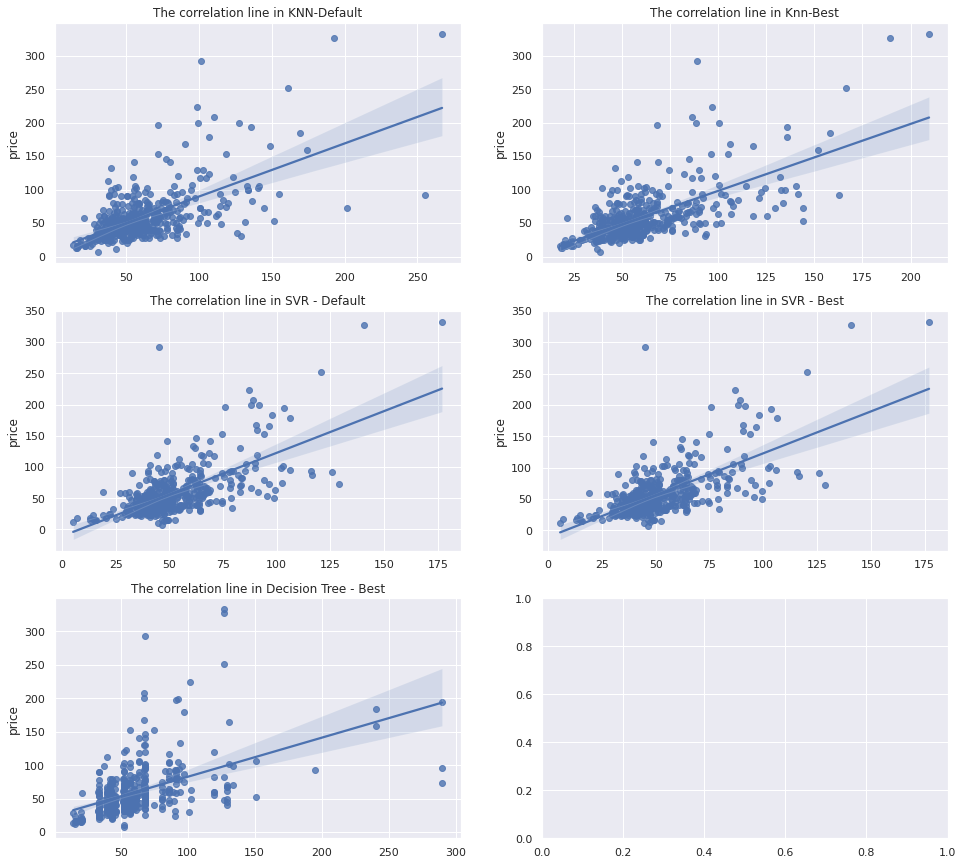

In [258]:
prediction_dictionaries['Decision Tree - Best'] = tree_model_prediction_best
plot_all_r2()

In [259]:
prediction_list['Decision Tree - Best'] = np.array(preds_svr_best[:20])
prediction_list

KNN-Default   KNN-Best  ...   SVR-Best  Decision Tree - Best
Actual Values                          ...                                 
65.0                  54.8  54.000000  ...  42.949620             42.949620
60.0                  55.4  47.666667  ...  19.081389             19.081389
36.0                  48.8  55.133333  ...  40.511994             40.511994
35.0                  53.2  48.933333  ...  41.159966             41.159966
32.0                  61.6  60.866667  ...  43.228470             43.228470
37.0                  43.4  39.000000  ...  49.366797             49.366797
40.0                  50.4  54.333333  ...  56.615057             56.615057
39.0                  31.6  31.400000  ...  43.367146             43.367146
41.0                  43.8  45.733333  ...  34.750942             34.750942
75.0                  51.6  45.800000  ...  42.989401             42.989401
55.0                  63.2  61.666667  ...  65.631403             65.631403
23.0                  28.8  23.666667  ...  19.042942             19.042942
44.0                  48.0  48.933333  ...  38.158796             38.158796
21.0                  24.8  44.600000  ...  43.421249             43.421249
24.0                  52.0  55.333333  ...  44.230493             44.230493
25.0                  30.8  45.066667  ...  47.377990             47.377990
73.0                  73.6  76.000000  ...  51.732786             51.732786
58.0                  73.2  77.200000  ...  66.775770             66.775770
49.0                  48.0  46.133333  ...  41.365466             41.365466
20.0                  37.4  35.666667  ...  28.307379             28.307379

[20 rows x 5 columns]

In [260]:
error_list['Decision Tree - Best'] = [tree_mse_best, tree_r2_best]
error_list.T

Mean Squared Error  R2 Score
KNN Default                   989.586581  0.367491
MSE KNN-Best                  871.450551  0.443000
SVR Default                   972.362603  0.378500
SVR Best                      972.080580  0.378680
Decision Tree - Best         1377.448669  0.119583

In [261]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor() #n_estimators is 100 by default
forest_model.fit(X_train, y_train)
forest_model_prediction = forest_model.predict(X_test)

forest_mse = metrics.mean_squared_error(y_test, forest_model_prediction)
forest_mae = metrics.mean_absolute_error(y_test, forest_model_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = metrics.r2_score(y_test, forest_model_prediction)

print("Mean Squared Error: {}".format(forest_mse))
print("Mean Absolute Error: {}".format(forest_mae))
print("Root Mean Absolute Error: {}".format(forest_rmse))
print("R2 score: {}".format(forest_r2))

Mean Squared Error: 776.8221155982905
Mean Absolute Error: 18.635833333333334
Root Mean Absolute Error: 27.871528763207277
R2 score: 0.5034826707353326


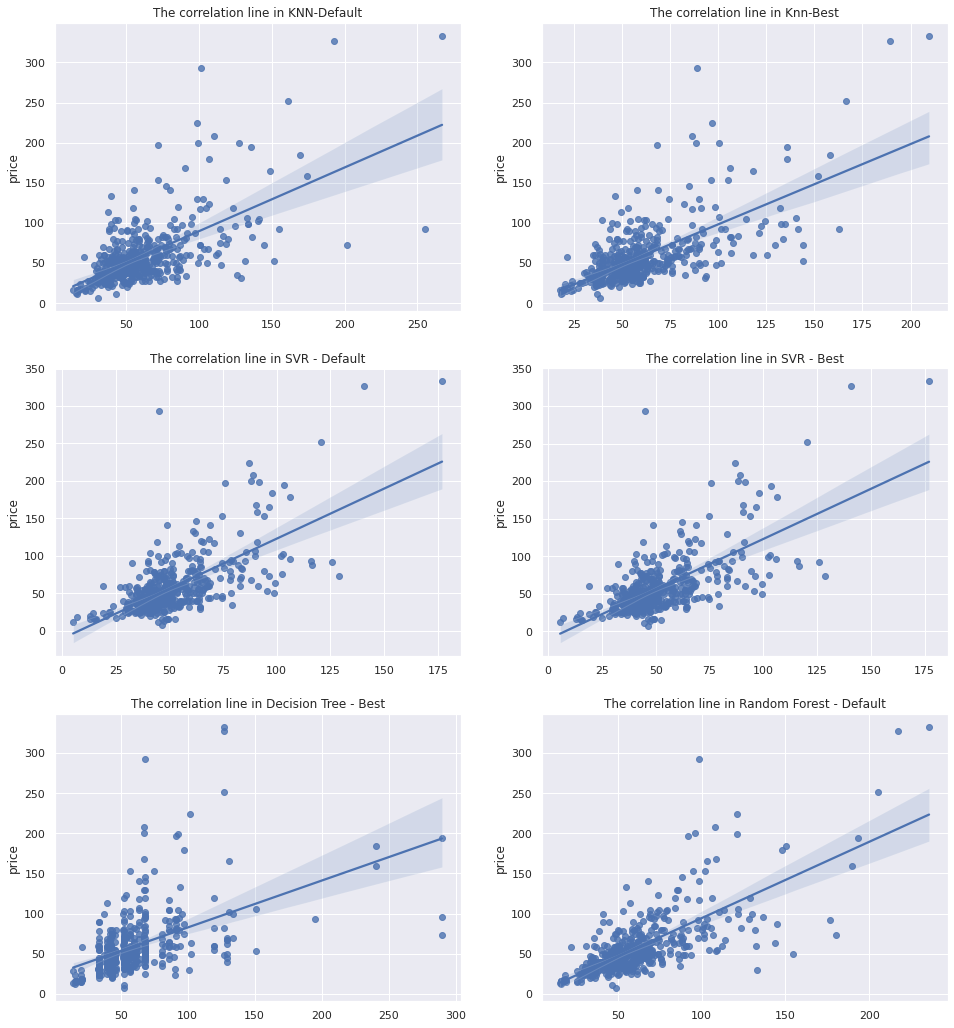

In [262]:
prediction_dictionaries['Random Forest - Default'] = forest_model_prediction
plot_all_r2()

In [263]:
prediction_list['Random Forest - Default'] = np.array(preds_svr[:20])
prediction_list

KNN-Default  ...  Random Forest - Default
Actual Values               ...                         
65.0                  54.8  ...                42.843910
60.0                  55.4  ...                19.100339
36.0                  48.8  ...                40.762217
35.0                  53.2  ...                41.145396
32.0                  61.6  ...                43.158888
37.0                  43.4  ...                49.447384
40.0                  50.4  ...                56.799050
39.0                  31.6  ...                43.405099
41.0                  43.8  ...                34.621716
75.0                  51.6  ...                43.167105
55.0                  63.2  ...                65.790648
23.0                  28.8  ...                19.036562
44.0                  48.0  ...                38.247018
21.0                  24.8  ...                43.477698
24.0                  52.0  ...                44.197519
25.0                  30.8  ...                47.299092
73.0                  73.6  ...                51.751865
58.0                  73.2  ...                66.888384
49.0                  48.0  ...                41.506417
20.0                  37.4  ...                28.118020

[20 rows x 6 columns]

In [264]:
error_list['Random Forest - Default'] = [forest_mse, forest_r2]
error_list.T

Mean Squared Error  R2 Score
KNN Default                      989.586581  0.367491
MSE KNN-Best                     871.450551  0.443000
SVR Default                      972.362603  0.378500
SVR Best                         972.080580  0.378680
Decision Tree - Best            1377.448669  0.119583
Random Forest - Default          776.822116  0.503483

In [265]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


linear_model = LinearRegression().fit(X_train, y_train)
linear_model_prediction = linear_model.predict(X_test)

linear_mse = metrics.mean_squared_error(y_test, linear_model_prediction)
linear_mae = metrics.mean_absolute_error(y_test, linear_model_prediction)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = metrics.r2_score(y_test, linear_model_prediction)

print("Mean Squared Error: {}".format(linear_mse))
print("Mean Absolute Error: {}".format(linear_mae))
print("Root Mean Absolute Error: {}".format(linear_rmse))
print("R2 score: {}".format(linear_r2))

Mean Squared Error: 879.5457490106118
Mean Absolute Error: 20.39980215130199
Root Mean Absolute Error: 29.65713656121595
R2 score: 0.4378253431565904


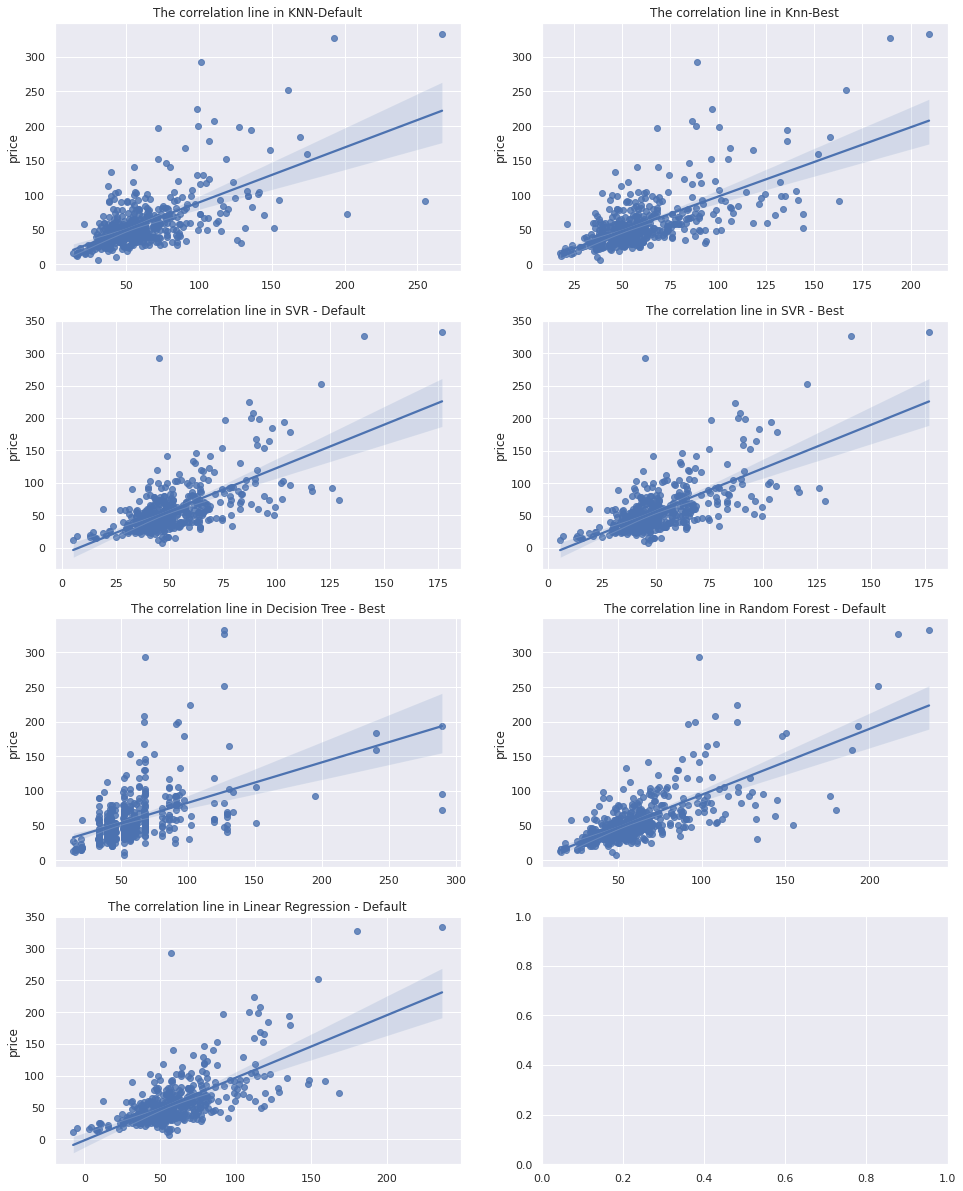

In [266]:
prediction_dictionaries['Linear Regression - Default'] = linear_model_prediction
plot_all_r2()

In [267]:
prediction_list['Linear Regression - Default'] = np.array(preds_svr[:20])
prediction_list

KNN-Default  ...  Linear Regression - Default
Actual Values               ...                             
65.0                  54.8  ...                    42.843910
60.0                  55.4  ...                    19.100339
36.0                  48.8  ...                    40.762217
35.0                  53.2  ...                    41.145396
32.0                  61.6  ...                    43.158888
37.0                  43.4  ...                    49.447384
40.0                  50.4  ...                    56.799050
39.0                  31.6  ...                    43.405099
41.0                  43.8  ...                    34.621716
75.0                  51.6  ...                    43.167105
55.0                  63.2  ...                    65.790648
23.0                  28.8  ...                    19.036562
44.0                  48.0  ...                    38.247018
21.0                  24.8  ...                    43.477698
24.0                  52.0  ...                    44.197519
25.0                  30.8  ...                    47.299092
73.0                  73.6  ...                    51.751865
58.0                  73.2  ...                    66.888384
49.0                  48.0  ...                    41.506417
20.0                  37.4  ...                    28.118020

[20 rows x 7 columns]

In [268]:
error_list['Linear Regression - Default'] = [linear_mse, linear_r2]
error_list.T

Mean Squared Error  R2 Score
KNN Default                          989.586581  0.367491
MSE KNN-Best                         871.450551  0.443000
SVR Default                          972.362603  0.378500
SVR Best                             972.080580  0.378680
Decision Tree - Best                1377.448669  0.119583
Random Forest - Default              776.822116  0.503483
Linear Regression - Default          879.545749  0.437825

In [269]:
from sklearn.linear_model import Ridge

alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 250, 500, 750, 1000, 1500, 2500, 5000, 10000, 100000, 1000000]
param_grid = {
    'alpha': alpha
}

ridge = Ridge(alpha=1).fit(X_train, y_train)
scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
scores_mse = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("CV Mean for Ridge (r2): ", np.mean(scores))
print("CV Mean for Ridge (mse): ", np.mean(scores_mse) * -1)

CV Mean for Ridge (r2):  0.350706694720578
CV Mean for Ridge (mse):  1233.9469502580803


In [270]:
grid_mse = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_result_mse = grid_mse.fit(X_train, y_train)

grid_r2 = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result_r2 = grid_r2.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [271]:
print('Best Score for mse: ', grid_mse.best_score_ * -1)
print('Best Params for mse: ', grid_mse.best_params_)
print()
print('Best Score for r2: ', grid_r2.best_score_)
print('Best Params for r2: ', grid_r2.best_params_)

Best Score for mse:  1233.1227752636412
Best Params for mse:  {'alpha': 100}

Best Score for r2:  0.350989946050028
Best Params for r2:  {'alpha': 100}


In [272]:
ridge_best = Ridge(alpha=100).fit(X_train, y_train)
ridge_best.fit(X_train, y_train)
ridge_pred = ridge_best.predict(X_test)

ridge_mse_best = metrics.mean_squared_error(y_test, ridge_pred)
ridge_mae_best = metrics.mean_absolute_error(y_test, ridge_pred)
ridge_rmse_best = np.sqrt(ridge_mse_best)
ridge_r2_best = metrics.r2_score(y_test, ridge_pred)

print("Mean Squared Error: {}".format(ridge_mse_best))
print("Mean Absolute Error: {}".format(ridge_mae_best))
print("Root Mean Absolute Error: {}".format(ridge_rmse_best))
print("R2 score: {}".format(ridge_r2_best))

Mean Squared Error: 878.8466239946531
Mean Absolute Error: 20.30550045481816
Root Mean Absolute Error: 29.645347425770762
R2 score: 0.43827219923699245


In [273]:
dict_val = {
    'Linear Model': [linear_r2, linear_mse],
    'Ridge': [ridge_r2_best, ridge_mse_best]
}
res_df_linear_ridge = pd.DataFrame(dict_val, index=['R2', 'MSE'])
res_df_linear_ridge

Linear Model       Ridge
R2       0.437825    0.438272
MSE    879.545749  878.846624

In [274]:
prediction_dictionaries['Ridge'] = ridge_pred

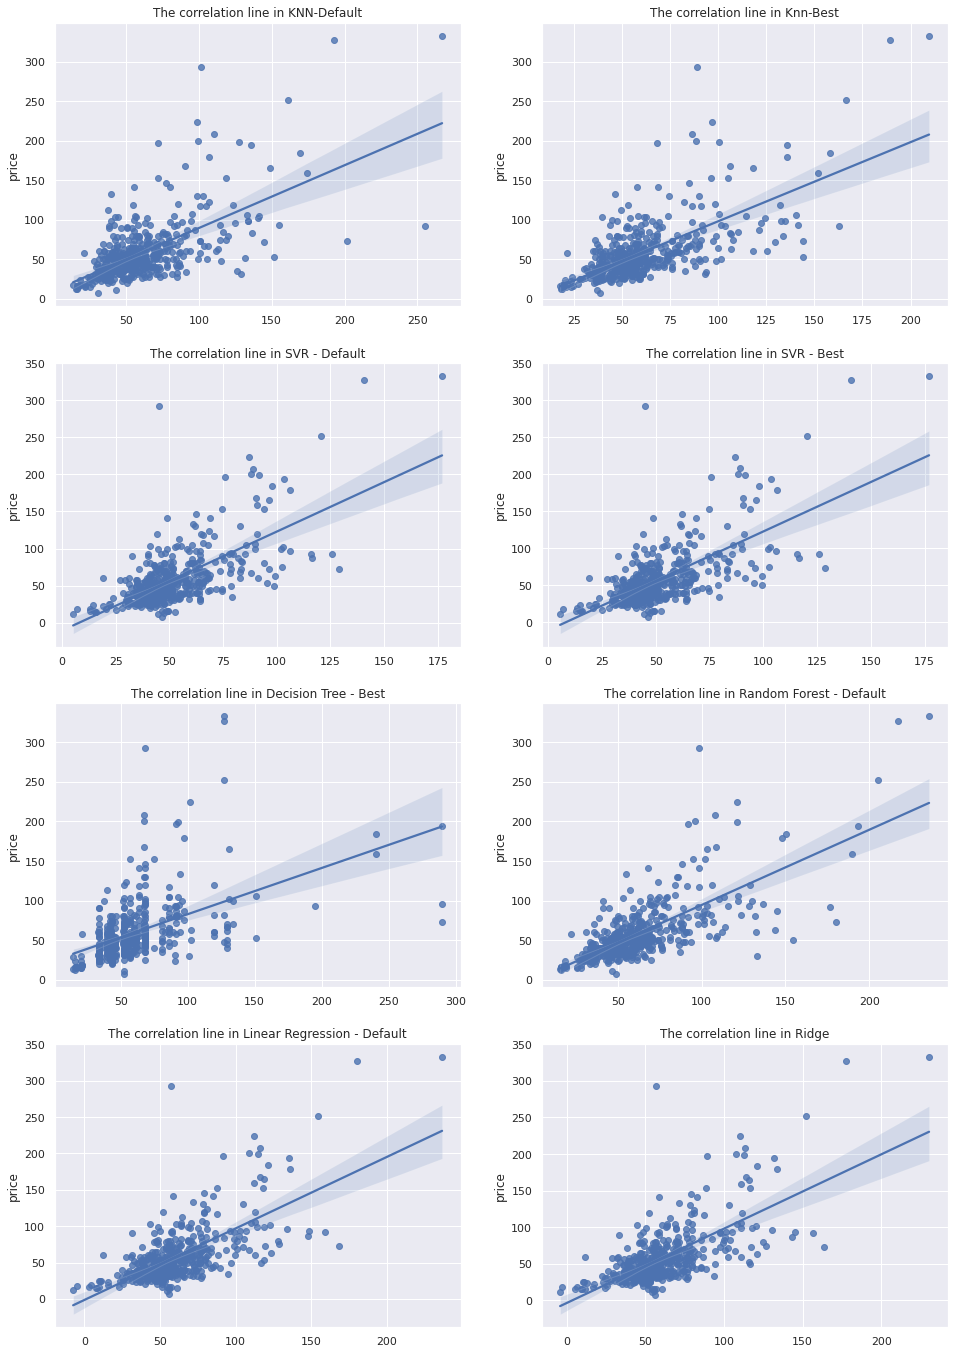

In [275]:
plot_all_r2()

In [276]:
prediction_list['Ridge'] = np.array(preds_svr[:20])
prediction_list

KNN-Default   KNN-Best  ...  Linear Regression - Default      Ridge
Actual Values                          ...                                        
65.0                  54.8  54.000000  ...                    42.843910  42.843910
60.0                  55.4  47.666667  ...                    19.100339  19.100339
36.0                  48.8  55.133333  ...                    40.762217  40.762217
35.0                  53.2  48.933333  ...                    41.145396  41.145396
32.0                  61.6  60.866667  ...                    43.158888  43.158888
37.0                  43.4  39.000000  ...                    49.447384  49.447384
40.0                  50.4  54.333333  ...                    56.799050  56.799050
39.0                  31.6  31.400000  ...                    43.405099  43.405099
41.0                  43.8  45.733333  ...                    34.621716  34.621716
75.0                  51.6  45.800000  ...                    43.167105  43.167105
55.0                  63.2  61.666667  ...                    65.790648  65.790648
23.0                  28.8  23.666667  ...                    19.036562  19.036562
44.0                  48.0  48.933333  ...                    38.247018  38.247018
21.0                  24.8  44.600000  ...                    43.477698  43.477698
24.0                  52.0  55.333333  ...                    44.197519  44.197519
25.0                  30.8  45.066667  ...                    47.299092  47.299092
73.0                  73.6  76.000000  ...                    51.751865  51.751865
58.0                  73.2  77.200000  ...                    66.888384  66.888384
49.0                  48.0  46.133333  ...                    41.506417  41.506417
20.0                  37.4  35.666667  ...                    28.118020  28.118020

[20 rows x 8 columns]

In [277]:
error_list['Ridge'] = [ridge_mse_best, ridge_r2_best]
error_list.T

Mean Squared Error  R2 Score
KNN Default                          989.586581  0.367491
MSE KNN-Best                         871.450551  0.443000
SVR Default                          972.362603  0.378500
SVR Best                             972.080580  0.378680
Decision Tree - Best                1377.448669  0.119583
Random Forest - Default              776.822116  0.503483
Linear Regression - Default          879.545749  0.437825
Ridge                                878.846624  0.438272

In [278]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score


elastic_net = ElasticNet(random_state=42).fit(X_train, y_train)
elastic_net_prediction = elastic_net.predict(X_test)

elastic_net_mse = metrics.mean_squared_error(y_test, elastic_net_prediction)
elastic_net_mae = metrics.mean_absolute_error(y_test, elastic_net_prediction)
elastic_net_rmse = np.sqrt(elastic_net_mse)
elastic_net_r2 = metrics.r2_score(y_test, elastic_net_prediction)

print("Mean Squared Error: {}".format(elastic_net_mse))
print("Mean Absolute Error: {}".format(elastic_net_mae))
print("Root Mean Absolute Error: {}".format(elastic_net_rmse))
print("R2 score: {}".format(elastic_net_r2))

Mean Squared Error: 919.9948179813853
Mean Absolute Error: 20.044970737856577
Root Mean Absolute Error: 30.33141635303873
R2 score: 0.4119717232694392


In [279]:
prediction_list['ElasticNet'] = np.array(preds_svr[:20])
prediction_list

KNN-Default   KNN-Best  ...      Ridge  ElasticNet
Actual Values                          ...                       
65.0                  54.8  54.000000  ...  42.843910   42.843910
60.0                  55.4  47.666667  ...  19.100339   19.100339
36.0                  48.8  55.133333  ...  40.762217   40.762217
35.0                  53.2  48.933333  ...  41.145396   41.145396
32.0                  61.6  60.866667  ...  43.158888   43.158888
37.0                  43.4  39.000000  ...  49.447384   49.447384
40.0                  50.4  54.333333  ...  56.799050   56.799050
39.0                  31.6  31.400000  ...  43.405099   43.405099
41.0                  43.8  45.733333  ...  34.621716   34.621716
75.0                  51.6  45.800000  ...  43.167105   43.167105
55.0                  63.2  61.666667  ...  65.790648   65.790648
23.0                  28.8  23.666667  ...  19.036562   19.036562
44.0                  48.0  48.933333  ...  38.247018   38.247018
21.0                  24.8  44.600000  ...  43.477698   43.477698
24.0                  52.0  55.333333  ...  44.197519   44.197519
25.0                  30.8  45.066667  ...  47.299092   47.299092
73.0                  73.6  76.000000  ...  51.751865   51.751865
58.0                  73.2  77.200000  ...  66.888384   66.888384
49.0                  48.0  46.133333  ...  41.506417   41.506417
20.0                  37.4  35.666667  ...  28.118020   28.118020

[20 rows x 9 columns]

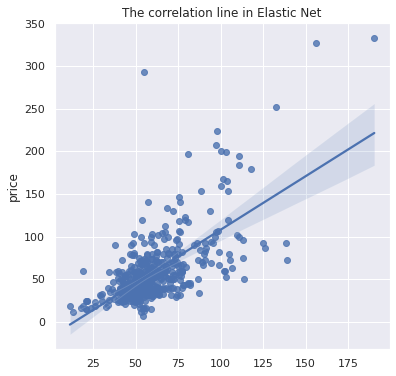

In [281]:
plt.figure(figsize=(6,6))
sns.regplot(elastic_net_prediction, y_test)
plt.title("The correlation line in Elastic Net")
plt.show()

In [139]:
error_list['ElasticNet'] = [ridge_mse_best, ridge_r2_best]
error_list.T

Mean Squared Error  R2 Score
KNN Default                          989.586581  0.367491
MSE KNN-Best                         871.450551  0.443000
SVR Default                          970.346074  0.379789
SVR Best                             970.452767  0.379721
Decision Tree - Best                1377.081816  0.119818
Random Forest - Default              758.365943  0.515279
Linear Regression - Default          879.545749  0.437825
Ridge                                878.846624  0.438272
ElasticNet                           878.846624  0.438272

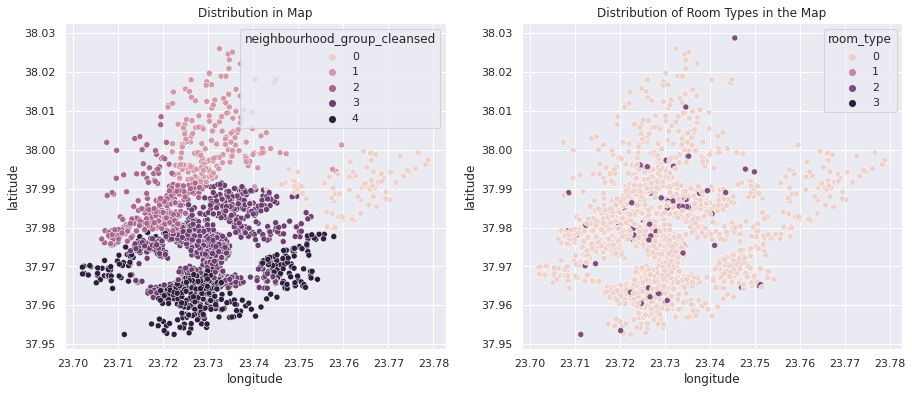

In [140]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
sns.scatterplot(new_pop['longitude'], new_pop['latitude'], hue=new_pop['neighbourhood_group_cleansed'], ax=ax1)
ax1.set_title('Distribution in Map')

ax2 = fig.add_subplot(122)
sns.scatterplot(new_pop['longitude'],new_pop['latitude'], hue=new_pop['room_type'], ax=ax2)
ax2.set_title('Distribution of Room Types in the Map')

plt.show()

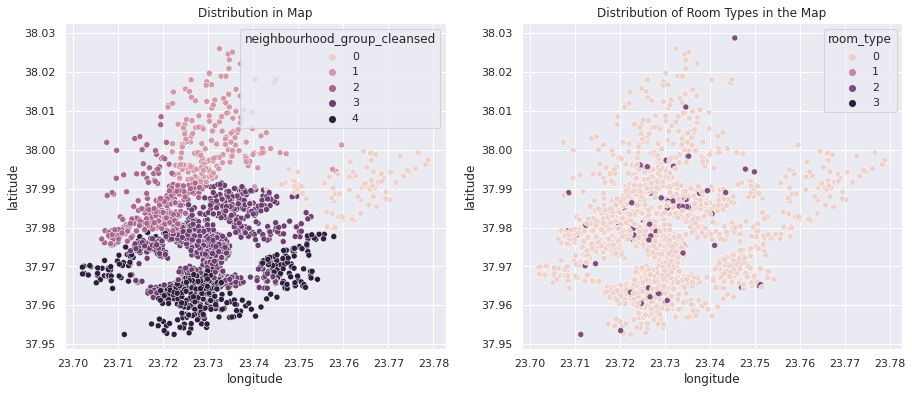

In [141]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
sns.scatterplot(new_pop['longitude'], new_pop['latitude'], hue=new_pop['neighbourhood_group_cleansed'], ax=ax1)
ax1.set_title('Distribution in Map')

ax2 = fig.add_subplot(122)
sns.scatterplot(new_pop['longitude'],new_pop['latitude'], hue=new_pop['room_type'], ax=ax2)
ax2.set_title('Distribution of Room Types in the Map')

plt.show()

In [142]:
import folium
from folium.plugins import FastMarkerCluster
latitudes = np.array(new_pop['latitude'])
longitudes = np.array(new_pop['longitude'])
la_mean = latitudes.mean()
lo_mean = longitudes.mean()
locations = list(zip(latitudes, longitudes))

m = folium.Map(location=[la_mean, lo_mean], zoom_start= 11.5)
FastMarkerCluster(data=locations).add_to(m)
m